<table border="0" style="width:100%">
 <tr>
    <td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/c/ce/IE_University_logo.svg" width=150>
     </td>
    <td><div style="font-family:'Courier New'">
            <div style="font-size:25px">
                <div style="text-align: right"> 
                    <b> MASTER IN BIG DATA</b>
                    <br>
                    Python for Data Analysis I
                    <br><br>
                    <em> Daniel Sierra Ramos </em>
                </div>
            </div>
        </div>
    </td>
 </tr>
</table>

# Group Assignment: Airbnb Listings Exploratory Data Analysis

## 📋 Assignment Overview

**Dataset:** Airbnb listings data from [Inside Airbnb](https://insideairbnb.com/get-the-data/)

**Objective:** Perform a comprehensive Exploratory Data Analysis (EDA) on Airbnb listings data for a **specific city of your choice** and conduct sentiment analysis on guest reviews.

**Important:** Your group must choose **ONE city** to analyze. You will need to download the corresponding data files (`listings.csv.gz`, `reviews.csv.gz`) from Inside Airbnb for your chosen city.
- The definition of all fields in all tables can be found in: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596
- You can use LLMs to help you with data analysis and visualization. Please refer to the **LLM_Guide_for_Data_Analysis.ipynb** notebook for tips on using AI assistants effectively throughout this assignment.
- LLMs are useful, but do not replace your own analysis. You must still write your own code and comments. Some parts of this assignment might be included in the Final exam, so make sure to write you understand all what you are doing. This assignment is not a test of your LLM skills, but a test of your own skills.
- All visualizations must be created using **Plotly** (for small visualizations you can use **Matplotlib** or **Seaborn**, but the general rule is to use **Plotly**)

**Deliverables:**
- This completed Jupyter notebook with all analysis and visualizations
    - Your original code
    - Your original comments in all ✍️ sections
---

## 📚 Learning Objectives

By completing this assignment, you will:
1. Perform a complete EDA workflow on a real-world dataset
2. Practice data cleaning and preprocessing techniques
3. Create meaningful visualizations to extract insights
4. Conduct sentiment analysis on text data
5. Formulate and answer business-relevant questions
6. Leverage AI tools (LLMs) effectively for data analysis

---

## 👥 Team Information

**Team Name:** _Team 2_

**Selected City:** _Madrid_

**Team Members:**
1. _Ignacio Agustín Moreno_
2. _Bader Al Eisa_
3. _Salah Mnemeine_
4. _Teresa Ghirardi_
5. _David Carrillo Aguilera_

---

## ✍️ Selected City: Madrid

## 📦 Part 1: Environment Setup and Data Loading

### Instructions:
1. Import all necessary libraries
2. Configure display settings for better data visualization
3. Load the datasets from the `data/` folder
4. Display basic information about each dataset

### Required Datasets:
- `listings.csv.gz` - Main dataset with property details
- `reviews.csv.gz` - Reviews data (you'll use this in Part 6)

**💡 Tip:** You can use LLMs to help identify which libraries you need and how to configure pandas display options.

In [1]:
!pip install geopandas 
!pip install folium

In [2]:
# TODO: Import necessary libraries
# Suggested: pandas, numpy, matplotlib, plotly
# For sentiment analysis later: you may need textblob

import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter, FuncFormatter
import numpy as np
import pandas as pd
import plotly
import seaborn as sns
import folium
from scipy import stats as stats

In [3]:
# TODO: Configure pandas display settings
# We will set these as we go through and display different things

In [4]:
# TODO: Load the datasets
# Note: .gz files can be read directly with pandas using argument compression='gzip'
# Check pandas documentation for more details (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

# Load listings
listings_df = pd.read_csv("data/listings.csv.gz", compression="gzip")

In [5]:
# Create a list with the dataframes and their names to make it easy to loop through both and print (this was later reduced to listings_df
# only, as we only analyze that df until part 6, where we finally bring in the reviews_df; initially we had the impression that we would 
# be analyzing ALL dfs, as it says in the cell above)

dfs = [
    ('Listings DF', listings_df)
]

In [6]:
# TODO: Display basic information about the datasets
# Show: shape, columns, data types, memory usage

# Loop through the list to print the info for both dfs
for name, df in dfs:
    print(name)
    df.info()
    print("")

Listings DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25000 non-null  int64  
 1   listing_url                                   25000 non-null  object 
 2   scrape_id                                     25000 non-null  int64  
 3   last_scraped                                  25000 non-null  object 
 4   source                                        25000 non-null  object 
 5   name                                          25000 non-null  object 
 6   description                                   24130 non-null  object 
 7   neighborhood_overview                         10586 non-null  object 
 8   picture_url                                   24999 non-null  object 
 9   host_id                                       250

### ✍️ Observations:
_Write your observations about the datasets here:_
- Number of listings: 25000 on listings, 1,275,992 on reviews
- Number of features: 79 on listings, 6 on reviews
- Key observations about data structure:

---

## 🔍 Part 2: Initial Data Exploration

### Instructions:
1. Display the first and last few rows
2. Generate statistical summaries
3. Check data types of all columns
4. Identify numerical and categorical columns
5. Look for any obvious data quality issues

### Questions to Answer:
- What types of variables do we have?
- What is the range of numerical variables?
- Are there any obvious outliers or suspicious values?
- Which columns might need data type conversion?

In [7]:
# TODO: Display first and last rows

# Same here, loop through that list printing first and last rows for each
for name, df in dfs:
    print(name)
    display(df.head(1))
    display(df.tail(1))
    print("\n\n")

Listings DF


id                         listing_url       scrape_id last_scraped  \
0  21853  https://www.airbnb.com/rooms/21853  20250914152907   2025-09-15   

            source                  name  \
0  previous scrape  Bright and airy room   

                                         description  \
0  We have a quiet and sunny room with a good vie...   

                               neighborhood_overview  \
0  We live in a leafy neighbourhood with plenty o...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/68483181/87bc...    83531  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.82                   4.21                4.67   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              2   

  calculated_host_listings_count_entire_homes  \
0                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            2   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.25  

[1 rows x 79 columns]

id                                       listing_url  \
24999  1508659056613604207  https://www.airbnb.com/rooms/1508659056613604207   

            scrape_id last_scraped       source  \
24999  20250914152907   2025-09-14  city scrape   

                                  name  \
24999  Cómoda habitación muy céntrica.   

                                             description  \
24999  Enjoy the simplicity of this quiet and central...   

      neighborhood_overview  \
24999                   NaN   

                                             picture_url    host_id  ...  \
24999  https://a0.muscache.com/pictures/hosting/Hosti...  564361678  ...   

      review_scores_communication review_scores_location review_scores_value  \
24999                         NaN                    NaN                 NaN   

      license instant_bookable calculated_host_listings_count  \
24999  Exempt                f                              1   

      calculated_host_listings_count_entire_homes  \
24999                                           0   

      calculated_host_listings_count_private_rooms  \
24999                                            1   

      calculated_host_listings_count_shared_rooms reviews_per_month  
24999                                           0               NaN  

[1 rows x 79 columns]

In [8]:
# TODO: Generate statistical summary for numerical columns

for name, df in dfs:
    print(name)
    display(df.describe())
    print("\n\n")

Listings DF


id     scrape_id       host_id  host_listings_count  \
count  2.500000e+04  2.500000e+04  2.500000e+04         24903.000000   
mean   7.248274e+17  2.025091e+13  2.806729e+08            63.174477   
std    5.719092e+17  7.316553e+00  2.200065e+08           153.447602   
min    2.185300e+04  2.025091e+13  1.745300e+04             1.000000   
25%    3.974878e+07  2.025091e+13  6.184860e+07             1.000000   
50%    9.026240e+17  2.025091e+13  2.542674e+08             5.000000   
75%    1.237047e+18  2.025091e+13  4.690354e+08            34.000000   
max    1.508659e+18  2.025091e+13  7.184549e+08          1487.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               24903.000000  25000.000000  25000.000000  25000.000000   
mean                   75.168454     40.422334     -3.693734      3.169920   
std                   175.195381      0.023665      0.028232      1.921082   
min                     1.000000     40.331400     -3.832060      1.000000   
25%                     2.000000     40.409670     -3.707486      2.000000   
50%                     7.000000     40.420827     -3.700850      3.000000   
75%                    44.000000     40.432819     -3.684085      4.000000   
max                  2767.000000     40.535530     -3.545904     16.000000   

          bathrooms      bedrooms  ...  review_scores_cleanliness  \
count  18960.000000  22488.000000  ...               19852.000000   
mean       1.310021      1.429340  ...                   4.667132   
std        0.704779      0.969122  ...                   0.477303   
min        0.000000      0.000000  ...                   1.000000   
25%        1.000000      1.000000  ...                   4.580000   
50%        1.000000      1.000000  ...                   4.800000   
75%        1.500000      2.000000  ...                   4.940000   
max       19.000000     25.000000  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           19852.000000                 19853.000000   
mean                4.726252                     4.728146   
std                 0.463793                     0.492312   
min                 1.000000                     1.000000   
25%                 4.680000                     4.700000   
50%                 4.850000                     4.880000   
75%                 4.970000                     4.990000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            19850.000000         19849.000000   
mean                 4.734457             4.533430   
std                  0.399064             0.535482   
min                  1.000000             1.000000   
25%                  4.650000             4.430000   
50%                  4.860000             4.660000   
75%                  4.970000             4.830000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                    25000.000000   
mean                        44.333840   
std                         93.334554   
min                          1.000000   
25%                          1.000000   
50%                          4.000000   
75%                         25.000000   
max                        407.000000   

       calculated_host_listings_count_entire_homes  \
count                                 25000.000000   
mean                                     37.792120   
std                                      90.637266   
min                                       0.000000   
25%                                       0.000000   
50%                                       2.000000   
75%                                      18.000000   
max                                     407.000000   

       calculated_host_listings_count_private_rooms  \
count                                  25000.000000   
mean                                   

In [9]:
# TODO: Identify numerical vs categorical columns
# Create lists of column names by type

def get_col_types(df: pd.DataFrame()) -> tuple:
    # Select columns by type and return a list of columns for each type
    
    cat_cols = df.select_dtypes(include=['category']).columns.tolist()
    num_cols = df.select_dtypes(include=['number']).columns.tolist()
    obj_cols = df.select_dtypes(include=['object']).columns.tolist()

    return (cat_cols, num_cols, obj_cols)
    

# Print column types for listings
cat_cols, num_cols, obj_cols = get_col_types(listings_df)

print(cat_cols, '\n\n', num_cols, '\n\n', obj_cols, '\n\n')

[] 

 ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_mon

In [10]:
# TODO: Check for obvious data quality issues
# Look at unique values for categorical columns
# Check ranges for numerical columns

# For each df, get the column types and print unique values, or the range for numeric cols
for name, df in dfs:
    print(name)

    cat_cols, num_cols, obj_cols = get_col_types(df)

    for col in cat_cols:
        print(f"\n{col}: {df[col].unique()}")

    for col in obj_cols:
        print(f"\n{col}: {df[col].unique()}")

    for col in num_cols:
        print(f"\n{col}: {df[col].min()} - {df[col].max()}")

Listings DF

listing_url: ['https://www.airbnb.com/rooms/21853' 'https://www.airbnb.com/rooms/30320'
 'https://www.airbnb.com/rooms/30959' ...
 'https://www.airbnb.com/rooms/1508295390166110966'
 'https://www.airbnb.com/rooms/1508573408483646673'
 'https://www.airbnb.com/rooms/1508659056613604207']

last_scraped: ['2025-09-15' '2025-09-14']

source: ['previous scrape' 'city scrape']

name: ['Bright and airy room' 'Apartamentos Dana Sol'
 'Beautiful loft in Madrid Center' ...
 'Cozy Apartment Gran Via Wifi Air Conditioner/Heat' 'Casa Nido'
 'Cómoda habitación muy céntrica.']

description: ['We have a quiet and sunny room with a good view in our 3 bedroom flat. In a welcoming atmosphere, our clean and respectful flatshare is located in a leafy neighbourhood with all facilities: shops, library, cafés and bars, a swimming pools, gyms, and fantastic parks. Well connected by metro and bus with the centre: 15 minutes. For walks, we are also a 20 min stroll away from the riverside.'
 nan
 'Bea

### ✍️ Key Findings:
_Document your findings:_
- Numerical columns identified: listings_df 43 | reviews_df 3
- Categorical columns identified:    listings_df 36 | reviews_df 3 
- Data quality issues noticed: Many many missing values across all dfs in a number of columns.
- Columns that need preprocessing:

listings_df:
- last_scraped -> date
- source -> categorical
- host_since -> date
- host_response_time -> categorical
- host_response_rate -> float
- host_acceptance_rate -> float
- host_is_superhost -> bool
- host_has_profile_pic -> bool
- host_identity_verified -> bool
- property_type -> categorical
- room_type -> categorical
- price -> float
- has_availability -> bool
- calendar_last_scraped -> date
- first_review -> date
- last_review -> date
- instant_bookable -> bool
- id -> object
- scrape_id -> object
- host_id -> object

reviews_df:
- date -> date
- listing_id -> object
- id -> object
- reviewer_id -> object

---

## 🧹 Part 3: Data Cleaning and Preprocessing

### Instructions:
1. **Check data types consistency:**
   - Review current data types of all columns
   - Identify columns with incorrect data types
   - Check for columns that should be numeric but are stored as strings
   - Verify datetime columns are properly formatted
   
2. **Check for duplicates:**
   - Identify duplicate rows in the dataset
   - Determine if duplicates are legitimate or errors
   - Decide on handling strategy (keep, remove, or investigate further)
   - Document your decision-making process

3. **Handle date columns:**
   - Convert to datetime format
   - Extract useful features if needed (e.g., host tenure)

4. **Analyze missing values:**
   - Calculate missing value counts and percentages
   - Visualize missing data patterns
   - Decide on handling strategy for each column

5. **Handle categorical variables:**
   - Check for inconsistent values
   - Standardize categories if needed

💡 **Note:** Outliers are legitimate data points and should NOT be removed during data cleaning, unless they are errors. They should be analyzed and understood in the univariate analysis section. 

In [11]:
# TODO: Check data types consistency
# Display current data types of all columns
# Identify columns that might have incorrect data types
# Examples:
#   - Columns with numbers stored as strings (e.g., prices with $)
#   - Columns with inconsistent string values
#   - Columns that should be dates but are stored as strings
#   - Boolean columns stored as strings (t/f)

# Cast IDs to string
ls_ids = ['id', 'scrape_id', 'host_id']
for col in ls_ids:
    listings_df[col] = listings_df[col].astype('string')

# Cast categorical columns to category
cat_cols = ['host_response_time', 'property_type', 'room_type', 'source']
for col in cat_cols:
    listings_df[col] = listings_df[col].astype('category')

# Cast boolean columns to bool
bool_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
for col in bool_cols:
    listings_df[col] = listings_df[col].astype('string').map({'t': True, 'f': False})

# Cast numeric columns to float
listings_df['host_response_rate'] = listings_df['host_response_rate']\
                                        .astype('string').str.replace('%', '', regex=False)\
                                        .astype(float) / 100
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate']\
                                            .astype('string').str.replace('%', '', regex=False)\
                                            .astype(float) / 100
listings_df['price'] = listings_df['price']\
                            .astype('string').str.replace('$', '', regex=False)\
                            .str.replace(',', '', regex=False)\
                            .astype(float)

# Update dfs
dfs = [
    ('Listings DF', listings_df)
]

# Print column types along with an observation, and alert if any column has more than 25% missing value
def print_col_types(df: pd.DataFrame(), name:str="") -> None:
    if name: print(f"{name.upper()} -")

    cat_cols, num_cols, obj_cols = get_col_types(df)

    if cat_cols:
        print(f"\n  Categorical columns: {len(cat_cols)}\n")
        for col in cat_cols:
            prnt = f"    {col} ({df[col].dtype}):"
            
            missing = (df[col].isna().sum() / len(df[col])) * 100
            
            if missing > 25: 
                prnt += f" MISSING - {missing}% |"

            prnt += f" Example value - {df[col][0]}\n"

            print(prnt)

    if obj_cols:
        print(f"\n  Object columns: {len(obj_cols)}\n")
        for col in obj_cols:
            prnt = f"    {col} ({df[col].dtype}):"
            
            missing = (df[col].isna().sum() / len(df[col])) * 100
            
            if missing > 25: 
                prnt += f" MISSING - {missing}% |"

            prnt += f" Example value - {df[col][0]}\n"

            print(prnt)

    if num_cols:
        print(f"\n  Numerical columns: {len(num_cols)}\n")
        for col in num_cols:
            prnt = f"    {col} ({df[col].dtype}):"
            
            missing = (df[col].isna().sum() / len(df[col])) * 100
            
            if missing > 25: 
                prnt += f" MISSING - {missing}% |"

            prnt += f" Example value - {df[col][0]}"

            prnt += f"| Mean - {df[col].mean()}"

            prnt += f"| Median - {df[col].median()}"

            prnt += f"| Mode - {df[col].mode()}\n"

            print(prnt)


for name, df in dfs:
    print_col_types(df, name=name)
    print("\n\n")

LISTINGS DF -

  Categorical columns: 4

    source (category): Example value - previous scrape

    host_response_time (category): Example value - within a day

    property_type (category): Example value - Private room in rental unit

    room_type (category): Example value - Private room


  Object columns: 28

    listing_url (object): Example value - https://www.airbnb.com/rooms/21853

    last_scraped (object): Example value - 2025-09-15

    name (object): Example value - Bright and airy room

    description (object): Example value - We have a quiet and sunny room with a good view in our 3 bedroom flat. In a welcoming atmosphere, our clean and respectful flatshare is located in a leafy neighbourhood with all facilities: shops, library, cafés and bars, a swimming pools, gyms, and fantastic parks. Well connected by metro and bus with the centre: 15 minutes. For walks, we are also a 20 min stroll away from the riverside.

    neighborhood_overview (object): MISSING - 57.656% | Exa

In [12]:
# TODO: Check for duplicate rows
# Count the number of duplicate rows
# Identify which rows are duplicated
# Examine some examples of duplicates to understand if they are legitimate
# Consider:
#   - Are they complete duplicates (all columns identical)?
#   - Could they be legitimate (same property listed multiple times)?
#   - Should you check duplicates based on specific columns (e.g., listing_id)?

display(listings_df.duplicated().any())

np.False_

In [13]:
# TODO: Handle date columns
# Convert date columns to datetime format
# Consider: host_since, first_review, last_review, etc.

ls_cols = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

for col in ls_cols:
    listings_df[col] = pd.to_datetime(listings_df[col])

# Update dfs
dfs = [
    ('Listings DF', listings_df)
]

In [14]:
# TODO: Analyze missing values
# Create a summary table showing count and percentage of missing values
pd.set_option('display.max_rows', None)

# Helper function to print missings
def get_missings(_dfs: list, numeric=False) -> None:
    if numeric:
        for name, df in _dfs:
            print(f"Missing values - {name}")
            num_cols = df.select_dtypes(include=['number']).columns.tolist()
            missings = df[num_cols].isna().sum() / len(df)
            missings_filtered = missings[missings > 0]
        
            if not missings_filtered.empty:
                display(missings_filtered)
                print("\n\n")
        return
        
    for name, df in _dfs:
        print(f"Missing values - {name}")
        missings = df.isna().sum() / len(df)
        missings_filtered = missings[missings > 0]
    
        if not missings_filtered.empty:
            display(missings_filtered)
            print("\n\n")

get_missings(dfs)

Missing values - Listings DF


description                    0.03480
neighborhood_overview          0.57656
picture_url                    0.00004
host_name                      0.00388
host_since                     0.00388
host_location                  0.32600
host_about                     0.49608
host_response_time             0.19540
host_response_rate             0.19540
host_acceptance_rate           0.16016
host_is_superhost              0.02672
host_thumbnail_url             0.00388
host_picture_url               0.00388
host_neighbourhood             0.68312
host_listings_count            0.00388
host_total_listings_count      0.00388
host_verifications             0.00388
host_has_profile_pic           0.00388
host_identity_verified         0.00388
neighbourhood                  0.57656
bathrooms                      0.24160
bathrooms_text                 0.00112
bedrooms                       0.10048
beds                           0.24140
price                          0.24188
minimum_minimum_nights   

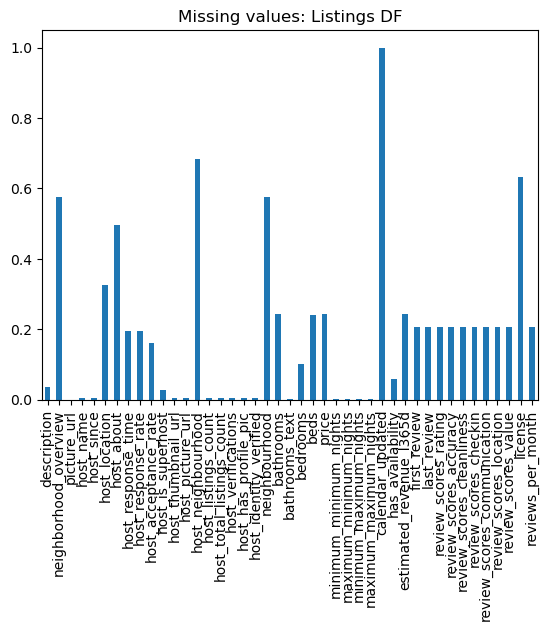

In [15]:
# TODO: Visualize missing data
# Create a bar chart or heatmap of missing values

for name, df in dfs:
    missings = df.isna().sum() / len(df)
    missings_filtered = missings[missings > 0]

    if missings_filtered.empty:
        continue

    plt.figure()
    missings_filtered.plot(kind="bar")
    plt.title(f"Missing values: {name}")
    plt.show()
    print("\n\n")


In [16]:
# TODO: Handle missing values
# Implement your chosen strategy for each column
# In general, you should:
# - Remove rows with too many missing values (typically > 80%)
# - For the rest, impute missing values with appropriate imputation methods
# Document your decisions

# Drop rows missing critical features
original_rows_ls = listings_df.shape[0]

critical_cols = ['price', 'neighbourhood_cleansed', 'property_type', 'room_type']
listings_df = listings_df.dropna(subset=critical_cols)

# Drop rows with >50% missing values
listings_df = listings_df[listings_df.isna().mean(axis=1) <= 0.5]
cleaned_rows_ls = listings_df.shape[0]
dropped_rows_ls = original_rows_ls - cleaned_rows_ls

print(f"Dropped {dropped_rows_ls} rows from the listings table.")

# Drop columns with >80% missing values
listings_df = listings_df.drop(columns=['calendar_updated'], errors='ignore')

# Impute price first to be able to impute other columns by it
listings_df['price_temp'] = listings_df['price'].fillna(listings_df['price'].median())
listings_df['price_range'] = pd.qcut(listings_df['price_temp'], q=4, duplicates='drop')

price_group_cols = [
    'neighbourhood_cleansed',
    'property_type',
    'room_type'
]

listings_df['price'] = (
    listings_df
    .groupby(price_group_cols, observed=True)['price']
    .transform(lambda x: x.fillna(x.median()))
)

# Update price range after proper imputation
listings_df['price_range'] = pd.qcut(listings_df['price'], q=4, duplicates='drop')

# Impute numerical columns
lsdf_num_cols_to_impute = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_location",
    "review_scores_value",
    "review_scores_communication",
    "reviews_per_month",
    "host_response_rate",
    "host_acceptance_rate",
    "bathrooms",
    "bedrooms",
    "beds",
    "price",
    "estimated_revenue_l365d",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "host_listings_count",
    "host_total_listings_count"
]

# Calculate skew first to determine method of imputation
skews_ls = listings_df[lsdf_num_cols_to_impute].skew()
lsdf_mean_cols = skews_ls[skews_ls.abs() < 1].index.tolist()
lsdf_median_cols = skews_ls[skews_ls.abs() >= 1].index.tolist()


display(listings_df[lsdf_mean_cols].skew())
display(listings_df[lsdf_median_cols].skew())

# Impute by neighbourhood and price range to get more relevant results, use median since skew is very high
group_cols = ['neighbourhood_cleansed', 'property_type', 'room_type', 'price_range']

for col in lsdf_mean_cols:
    listings_df[col] = (
        listings_df.groupby(group_cols, observed=True)[col]
                   .transform(lambda x: x.fillna(x.median()))
    )
    listings_df[col] = listings_df[col].fillna(listings_df[col].mean())

for col in lsdf_median_cols:
    listings_df[col] = (
        listings_df.groupby(group_cols, observed=True)[col]
                   .transform(lambda x: x.fillna(x.median()))
    )
    listings_df[col] = listings_df[col].fillna(listings_df[col].median())

# Imputable categorical columns
if "unknown" not in listings_df['host_response_time'].cat.categories:
    listings_df['host_response_time'] = listings_df['host_response_time'].cat.add_categories(["unknown"])
    
listings_df['host_response_time'] = listings_df['host_response_time'].fillna("unknown") # Missingness is informative

# Imputable boolean columns
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].fillna(False) # According to research, in earlier listings missing meant false

listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].fillna(False) # Missing usually indicates lacking profile data

listings_df['host_identity_verified'] = listings_df['host_identity_verified'].fillna(False)
    
listings_df['has_availability'] = listings_df['has_availability'].fillna(False) 

# Update dfs
dfs = [
    ('Listings DF', listings_df)
]

# Check missing values again to confirm proper imputation
get_missings(dfs)

Dropped 6047 rows from the listings table.


minimum_maximum_nights    0.265166
maximum_maximum_nights    0.104661
dtype: float64

review_scores_rating           -3.879103
review_scores_accuracy         -4.211144
review_scores_cleanliness      -4.133681
review_scores_checkin          -4.649873
review_scores_location         -4.190673
review_scores_value            -3.423517
review_scores_communication    -4.543350
reviews_per_month               2.837187
host_response_rate             -2.973752
host_acceptance_rate           -1.998860
bathrooms                       4.080436
bedrooms                        2.882048
beds                            4.654861
price                          31.625573
estimated_revenue_l365d        29.627165
minimum_minimum_nights          9.007177
maximum_minimum_nights          6.790482
host_listings_count             3.636029
host_total_listings_count       3.588478
dtype: float64

Missing values - Listings DF


/var/folders/jr/f_1nmytd20v46jvkl2_4c0p80000gn/T/ipykernel_7338/3545754105.py:101: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  listings_df['host_is_superhost'] = listings_df['host_is_superhost'].fillna(False) # According to research, in earlier listings missing meant false
/var/folders/jr/f_1nmytd20v46jvkl2_4c0p80000gn/T/ipykernel_7338/3545754105.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].fillna(False) # Missing usually indicates lacking profile data
/var/folders/jr/f_

description              0.029811
neighborhood_overview    0.576268
host_name                0.004907
host_since               0.004907
host_location            0.342268
host_about               0.484462
host_thumbnail_url       0.004907
host_picture_url         0.004907
host_neighbourhood       0.711708
host_verifications       0.004907
neighbourhood            0.576268
bathrooms_text           0.001108
first_review             0.165040
last_review              0.165040
license                  0.555163
dtype: float64

### ✍️ Data Cleaning Decisions:
_Document your data cleaning approach:_

**Data Types:**
- Columns with incorrect types identified & type conversions performed:
    - To String - id, scrape_id, host_id, id, listing_id, reviewer_id
    - To Categorical: host_response_time, property_type, room_type, source
    - To Boolean: host_is_superhost, host_has_profile_pic, host_identity_verified, has_availability, instant_bookable
    - To Numeric: host_response_rate, host_acceptance_rate, price

**Duplicates:**
- Number of duplicate rows found: 0
- Decision on handling (removed/kept) and justification: None

**Missing Values:**
- Columns dropped and why: calendar_updated - 100% missing values
- Imputation strategies used:
    - Median used instead of mean in columns with significant skew.
    - Price was imputed by the median price in the same neighbourhood_cleansed, property_type, and room_type, to get the best approximation for that particular type of listing.
    - Most other variables were imputed median with that same grouping, plus price_range, to help classify even further.
    - Host response time was imputed as unknown when null because in this case missingness might be informative.
    - Boolean values were imputed to false because research reveals that due to the way Airbnb registers data that is the most likely with older data.
- Rows removed and justification: Would have dropped if they were missing all critical columns or had more than 50% values missing, but no rows met the criteria.

**Other Transformations:**
- Date conversions: listings - last_scraped, host_since, calendar_last_scraped, first_review, last_review | reviews - date
- Feature engineering:
    - price_range was created using pd.qcut to divide listings into quartiles.
- Categorical standardizations:
    - Property type & room type values were cleaned and converted to consistent categories.
    - The reliable column neighbourhood_cleansed was used as the primary neighbourhood identifier.
    - Messier fields such as host_neighbourhood and neighbourhood were not imputed, as they lacked consistency and their missingness was not informative.
    - Host response time stored as a categorical field with ordered levels.
    - Missing values were standardised to a new category "unknown"
    - Non-essential free-text fields (e.g., description, neighborhood_overview, host_about) were left untouched and not imputed.

---

## 📊 Part 4: Univariate Analysis

### 💡 Why Univariate Analysis?
Univariate analysis is the simplest form of analyzing data. "Uni" means "one", so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and its major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

**Key Purposes:**
1. **Understand the Distribution:** Is the data normal, skewed, or uniform? This affects what statistical tests you can use.
2. **Identify Outliers:** Spot values that are far from the mean/median which might indicate data quality issues or interesting anomalies.
3. **Check Data Quality:** Find impossible values (e.g., negative price) or unexpected frequencies.
4. **Summary Statistics:** Get a sense of the "typical" value (mean/median) and the spread (std dev/IQR).

### Instructions:
1. **Analyze Numerical Variables:**
   - Visualize distributions (histograms, boxplots)
   - Calculate summary statistics (mean, median, std, min, max)
   - Interpret the findings (skewness, outliers)

2. **Analyze Categorical Variables:**
   - Calculate frequency counts and percentages
   - Visualize with bar charts or pie charts
   - Identify dominant categories and rare labels

3. **Focus on Key Variables:**
   - Price (target variable)
   - Review scores
   - Property/Room types
   - Neighbourhoods


### 4.1 Numerical Variables Analysis

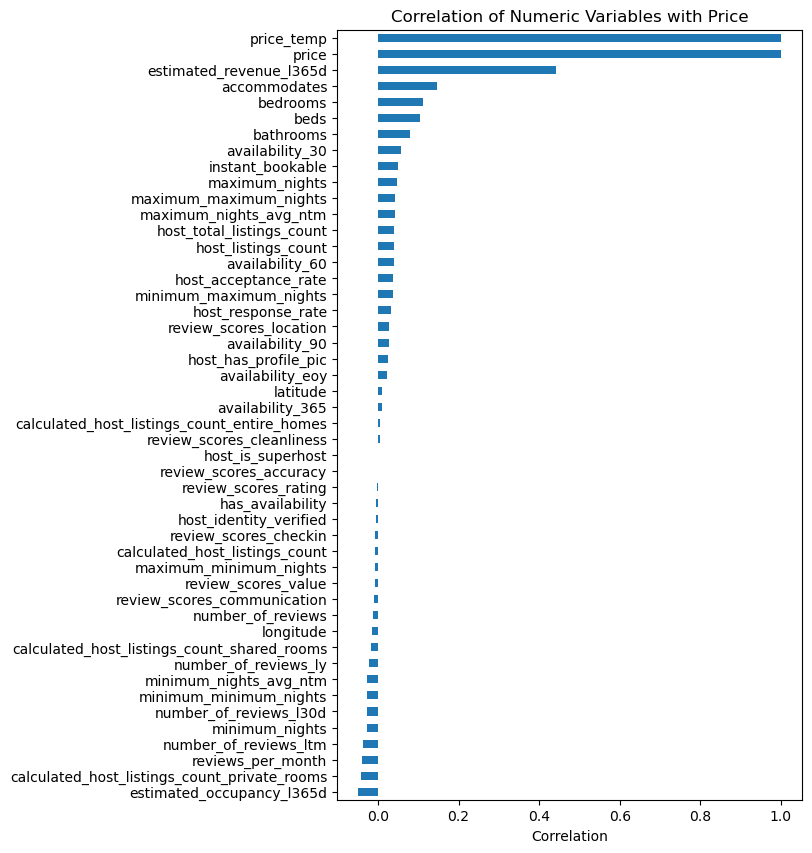

In [17]:
# Draw out correlation matrix to understand which variables might be more relevant to guide our analysis
corr_with_price = listings_df.corr(numeric_only=True)['price'].sort_values()

plt.figure(figsize=(6, 10))
corr_with_price.plot(kind='barh')
plt.title("Correlation of Numeric Variables with Price")
plt.xlabel("Correlation")
plt.show()

count        mean        std  min   25%    50%    75%      max  \
price  18953.0  156.691447  492.25535  8.0  70.0  110.0  164.0  25654.0   

            skew  
price  31.625573


424 listings have zero estimated revenue (inactive).


count        mean         std  min   25%    50%    75%  \
availability_365  18529.0  209.693292  114.728222  0.0  95.0  242.0  315.0   

                    max      skew  
availability_365  364.0 -0.358374


4527 listings have zero estimated revenue (inactive).


count          mean           std   min     25%  \
estimated_revenue_l365d  14426.0  17611.395051  28391.191728  48.0  4104.0   

                             50%      75%        max       skew  
estimated_revenue_l365d  11520.0  24360.0  2001012.0  29.078142

count      mean       std  min   25%   50%   75%  \
review_scores_location  18953.0  4.748038  0.357339  1.0  4.67  4.86  4.95   

                        max     skew  
review_scores_location  5.0 -4.36632

count       mean         std  min  25%   50%  \
host_total_listings_count  18953.0  84.289769  184.066083  1.0  3.0  10.0   

                            75%     max      skew  
host_total_listings_count  60.0  2767.0  3.598508

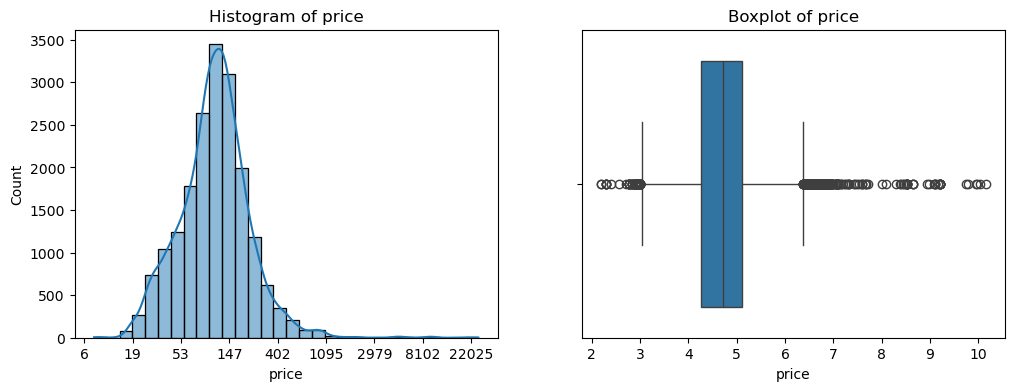

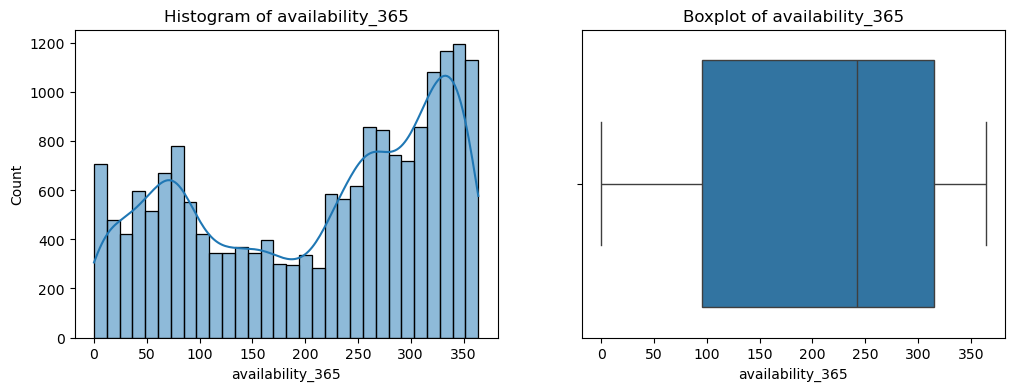

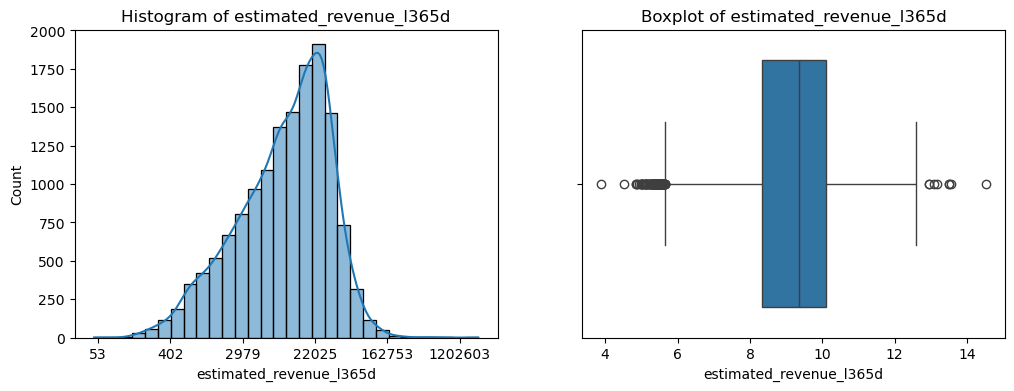

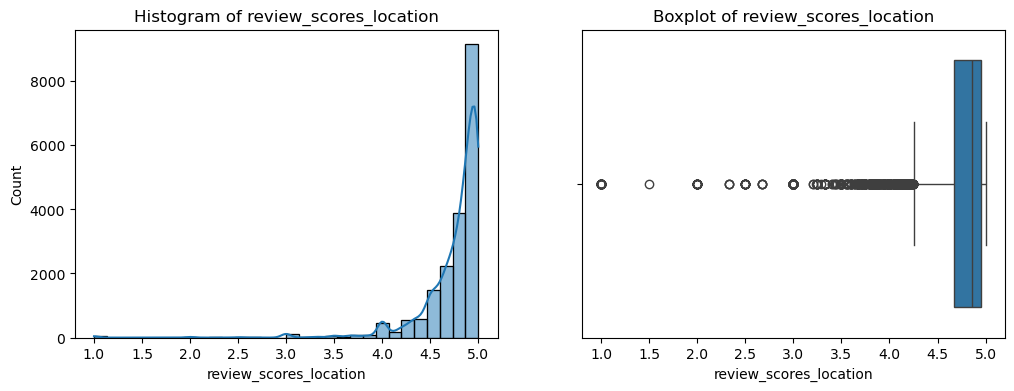

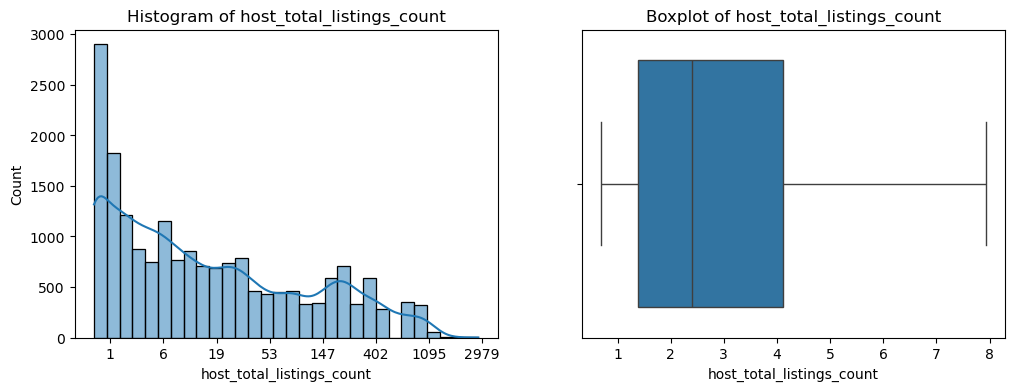

In [18]:
# TODO: Analyze distribution of 5 NUMERICAL variables
# Include: histogram, box plot, statistics, interpretation
# Variables: accomodates, estimated_revenue_l365d, availability_365, review_scores_location, host_total_listings_count

num_vars = [
    "price",
    "availability_365",
    "estimated_revenue_l365d",
    "review_scores_location",
    "host_total_listings_count"
]

for col in num_vars:
    data = listings_df[col].copy()

    # Analyze only active properties (>0 revenue)
    if col == "estimated_revenue_l365d":
        inactive = (data == 0).sum()
        print(f"\n{inactive} listings have zero estimated revenue (inactive).")
        
        # Filter to active
        data = data[data > 0]

    # Availability 365
    if col == "availability_365":
        inactive = (data > 364).sum()
        print(f"\n{inactive} listings have zero estimated revenue (inactive).")
        
        # Filter to active
        data = data[data < 365]


    # Apply log transform for skewed variables
    if col in ['estimated_revenue_l365d', 'host_total_listings_count', 'price']:
        data_log = np.log1p(data)
    else:
        data_log = data

    stats_df = data.describe()
    stats_df["skew"] = data.skew()
    stats_df = stats_df.to_frame().T
    display(stats_df)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(data_log, ax=axes[0], kde=True, bins=30)
    axes[0].set_title(f"Histogram of {col}")

    # Make axis interpretable (undo log conversion)
    if col in ['estimated_revenue_l365d', 'host_total_listings_count', 'price']:
        xticks = axes[0].get_xticks()
        axes[0].xaxis.set_major_locator(FixedLocator(xticks))
        axes[0].set_xticklabels([f"{int(np.expm1(x))}" for x in xticks])

    # Boxplot
    sns.boxplot(x=data_log, ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

    # Make axis interpretable (undo log conversion)
    if col in ['estimated_revenue_l365d', 'host_total_listings_count', 'price']:
        xticks = axes[1].get_xticks()
        axes[1].xaxis.set_major_locator(FixedLocator(xticks))
        axes[1]


**✍️ Analysis Insights:**

**Price** interpretation:

More or less normally distributed around €100, extreme outliers on the high side, with some properties going as high as €25,000 per night.

**Yearly Availability** interpretation:

A surprisingly uniform distribution with about 400 properties per day, however this starts going up around 250 days in a year. This likely means there are a lot of AirBnbs which just kind of sit empty a lot of the year, and only a certain percentage of listings are truly active.

**Estimated revenue l365d** interpretation:

Most listings which are active earn around €22,000 a year with a pretty steep exponential decline either side. The low tail is much wider than the high tail, but there are some extreme outliers which skew the dataset upwards.

**Location reviews** interpretation:

Skewed upwards very highly, extremely centered around 5 stars. Likely subject to self-selection bias as well as politeness, but surprising to what a degree listings have 5 star location.

**Host_total_listings_count** interpretation:

The great majority of hosts have 1 property only, with this number declining exponentially as the number of properties goes up. It clearly reveals the makeup of professional hosts as compared to normal ones.


### 4.2 Categorical Variables Analysis


===== PROPERTY_TYPE =====
(Grouped all property types with <100 occurrences into 'Other')


count  percent
property_type                                    
Entire rental unit                 12292    64.86
Private room in rental unit         3688    19.46
Other                                634     3.35
Private room in home                 488     2.57
Entire loft                          359     1.89
Entire condo                         354     1.87
Entire serviced apartment            258     1.36
Entire home                          221     1.17
Room in hotel                        220     1.16
Private room in hostel               179     0.94
Private room in condo                149     0.79
Private room in bed and breakfast    111     0.59

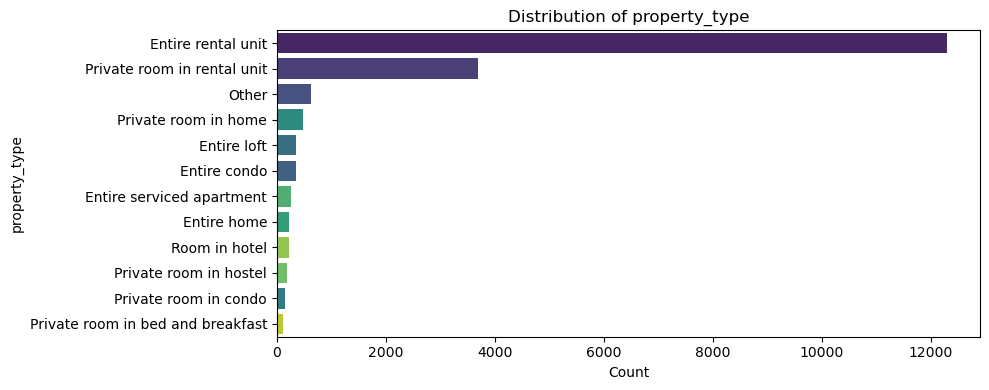


===== ROOM_TYPE =====


count  percent
room_type                      
Entire home/apt  13648    72.01
Private room      5116    26.99
Shared room        148     0.78
Hotel room          41     0.22

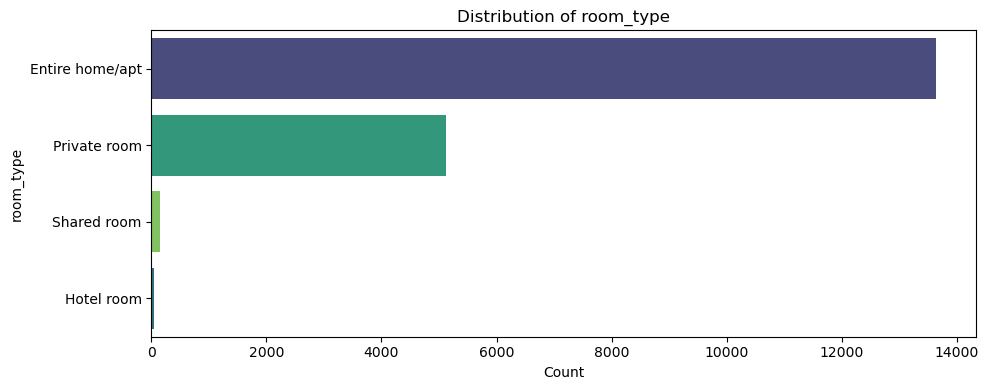


===== HOST_IS_SUPERHOST =====


count  percent
host_is_superhost                
False              14192    74.88
True                4761    25.12

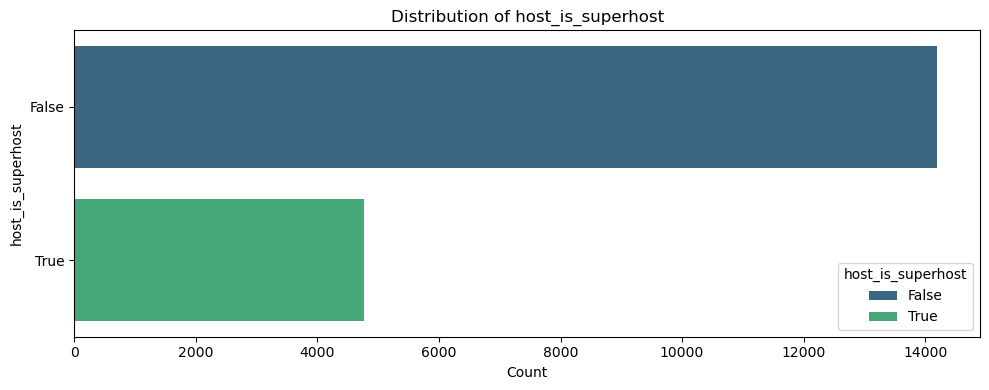


===== HOST_RESPONSE_TIME =====


count  percent
host_response_time                
within an hour      13098    69.11
within a few hours   1869     9.86
within a day         1762     9.30
unknown              1169     6.17
a few days or more   1055     5.57

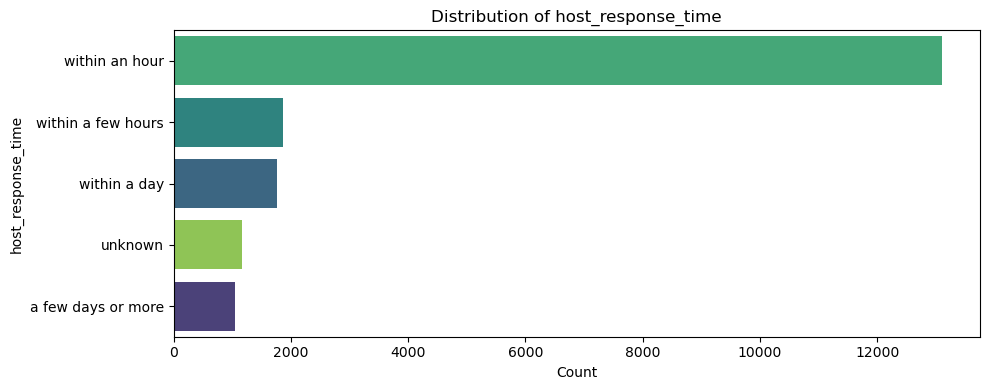

In [19]:
# TODO: Analyze distribution of 5 CATEGORICAL variables
# Include: value counts, percentages, bar chart
# Columns: neighbourhood_cleansed, property_type, room_type, host_is_superhost, host_response_time

cat_vars = [
    "property_type",
    "room_type",
    "host_is_superhost",
    "host_response_time"
]

for col in cat_vars:
    print(f"\n===== {col.upper()} =====")

    series = listings_df[col].copy()

    # property_type: group categories with <100 occurrences into 'other'
    if col == "property_type":
        counts = series.value_counts()
        common_types = counts[counts >= 100].index
        
        # Replace rare categories with "Other"
        series = series.apply(lambda x: x if x in common_types else "Other")
        print("(Grouped all property types with <100 occurrences into 'Other')")

    # Value counts & percentages
    counts = series.value_counts(dropna=False)
    perc = series.value_counts(normalize=True, dropna=False) * 100
    display(pd.DataFrame({"count": counts, "percent": perc.round(2)}))

    # Plot
    plt.figure(figsize=(10, 4))
    sns.countplot(
        y=series,
        hue=series,   
        order=counts.index,
        palette="viridis"
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**✍️ Analysis Insights:**
_Write your observations about your analysis_

Host Response Time:

A significant majority of hosts respond within an hour ( around 69%), showing strong host engagement across the platform.
Response times beyond a day represent less than 6% of listings, meaning slow responders are a small minority.
The “unknown” category is also small, supporting the idea that most hosts provide timely communication.

Superhost Status

About 25% of listings are managed by superhosts and the rest (around 75%) by regular hosts.
This proportion suggests that while superhosts are a minority, they still represent a meaningful share of the market and likely influence competitive dynamics.

Room Type Distribution:

The market is heavily dominated by entire homes/apartments (≈72%), followed by private rooms (≈27%).
Shared rooms and hotel rooms represent less than 1% each, indicating very limited supply and low host participation in these categories.

Property Type Distribution:

Entire rental units make up the majority ( around 65%), with private rooms in rental units forming the second largest category.
All other property types appear in very small numbers, and most fall below the 1–2% range.
This indicates a largely homogeneous supply structure, primarily consisting of traditional apartment-style rentals.


In [20]:
# Decided to map neighbourhood to get a more visual understanding of it
# aggregate by neighbourhood: mean lat/lon + count
neigh_summary = (
    listings_df
    .groupby("neighbourhood_cleansed")
    .agg(
        lat_mean=("latitude", "mean"),
        lon_mean=("longitude", "mean"),
        n_listings=("neighbourhood_cleansed", "size")
    )
    .reset_index()
)

# filter out neighbourhoods with very few listings
min_listings = 10
neigh_summary = neigh_summary[neigh_summary["n_listings"] >= min_listings]

# set up bubble size scaling
min_radius = 4
max_radius = 20

counts = neigh_summary["n_listings"]
min_count, max_count = counts.min(), counts.max()

def scale_radius(n):
    if max_count == min_count:
        return (min_radius + max_radius) / 2
    return min_radius + (n - min_count) / (max_count - min_count) * (max_radius - min_radius)

# create base map centered on the mean of the listings
m = folium.Map(
    location=[listings_df["latitude"].mean(), listings_df["longitude"].mean()],
    zoom_start=12,
    tiles="CartoDB positron"  # nice clean basemap
)

# add one circle per neighbourhood
for _, row in neigh_summary.iterrows():
    radius = scale_radius(row["n_listings"])
    popup_text = (
        f"<b>{row['neighbourhood_cleansed']}</b><br>"
        f"Listings: {row['n_listings']}"
    )
    
    folium.CircleMarker(
        location=[row["lat_mean"], row["lon_mean"]],
        radius=radius,
        color="red",
        weight=1,
        fill=True,
        fill_color="red",
        fill_opacity=0.5,
        popup=folium.Popup(popup_text, max_width=250),
    ).add_to(m)

m

**✍️ Analysis Insights:**
_Write your observations about your analysis_

Neighbourhood Patterns (Spatial Distribution):

Listing density is strongly concentrated in central districts (Centro, Salamanca, Chamberí, Retiro).
Peripheral neighbourhoods have significantly fewer listings, indicating lower Airbnb penetration and less tourism-driven demand in those areas.



### ✍️ Summary of Univariate Analysis:
_Summarize key findings from your univariate analysis:_

**Numerical Variables:**
- 

Most numerical variables outline a very clear difference between professional hosts and normal hosts on the platform.

**Categorical Variables:**
- 

Hosts that do respond tend to be quite involved, and about 25% of them are super hosts. Rooms and properties are most often full rental units (apartments) in Madrid, and unsurprisingly, a great majority of them are in the center of the city.

---

## 🔗 Part 5: Bivariate and Multivariate Analysis

### 💡 Why Bivariate & Multivariate Analysis?
While univariate analysis describes a single variable, **bivariate analysis** explores the relationship between *two* variables, and **multivariate analysis** involves *three or more* variables. This is where you move from "describing" data to "explaining" it.

**Key Purposes:**
1. **Identify Correlations:** Does one variable increase when another increases? (e.g., *Do listings with more bedrooms cost more?*)
2. **Compare Groups:** How does a numerical variable behave across different categories? (e.g., *Do Superhosts get higher review scores than regular hosts?*)
3. **Detect Patterns & Anomalies:** Some patterns only emerge when looking at variables together (e.g., *High prices in a low-cost neighbourhood might indicate a luxury penthouse*).
4. **Test Hypotheses:** Validate your assumptions about the business drivers.

### Instructions:
1. **Numerical vs. Numerical:**
   - Use scatter plots to visualize relationships
   - Calculate correlation matrices (heatmap)

2. **Categorical vs. Numerical:**
   - Use box plots or violin plots to compare distributions across groups
   - Calculate aggregate statistics (groupby)

3. **Multivariate (3+ variables):**
   - Add a third dimension to your plots using color (hue) or size
   - Example: Scatter plot of *Price* vs *Reviews*, colored by *Room Type*


### 5.1 Numerical vs Numerical Relationships

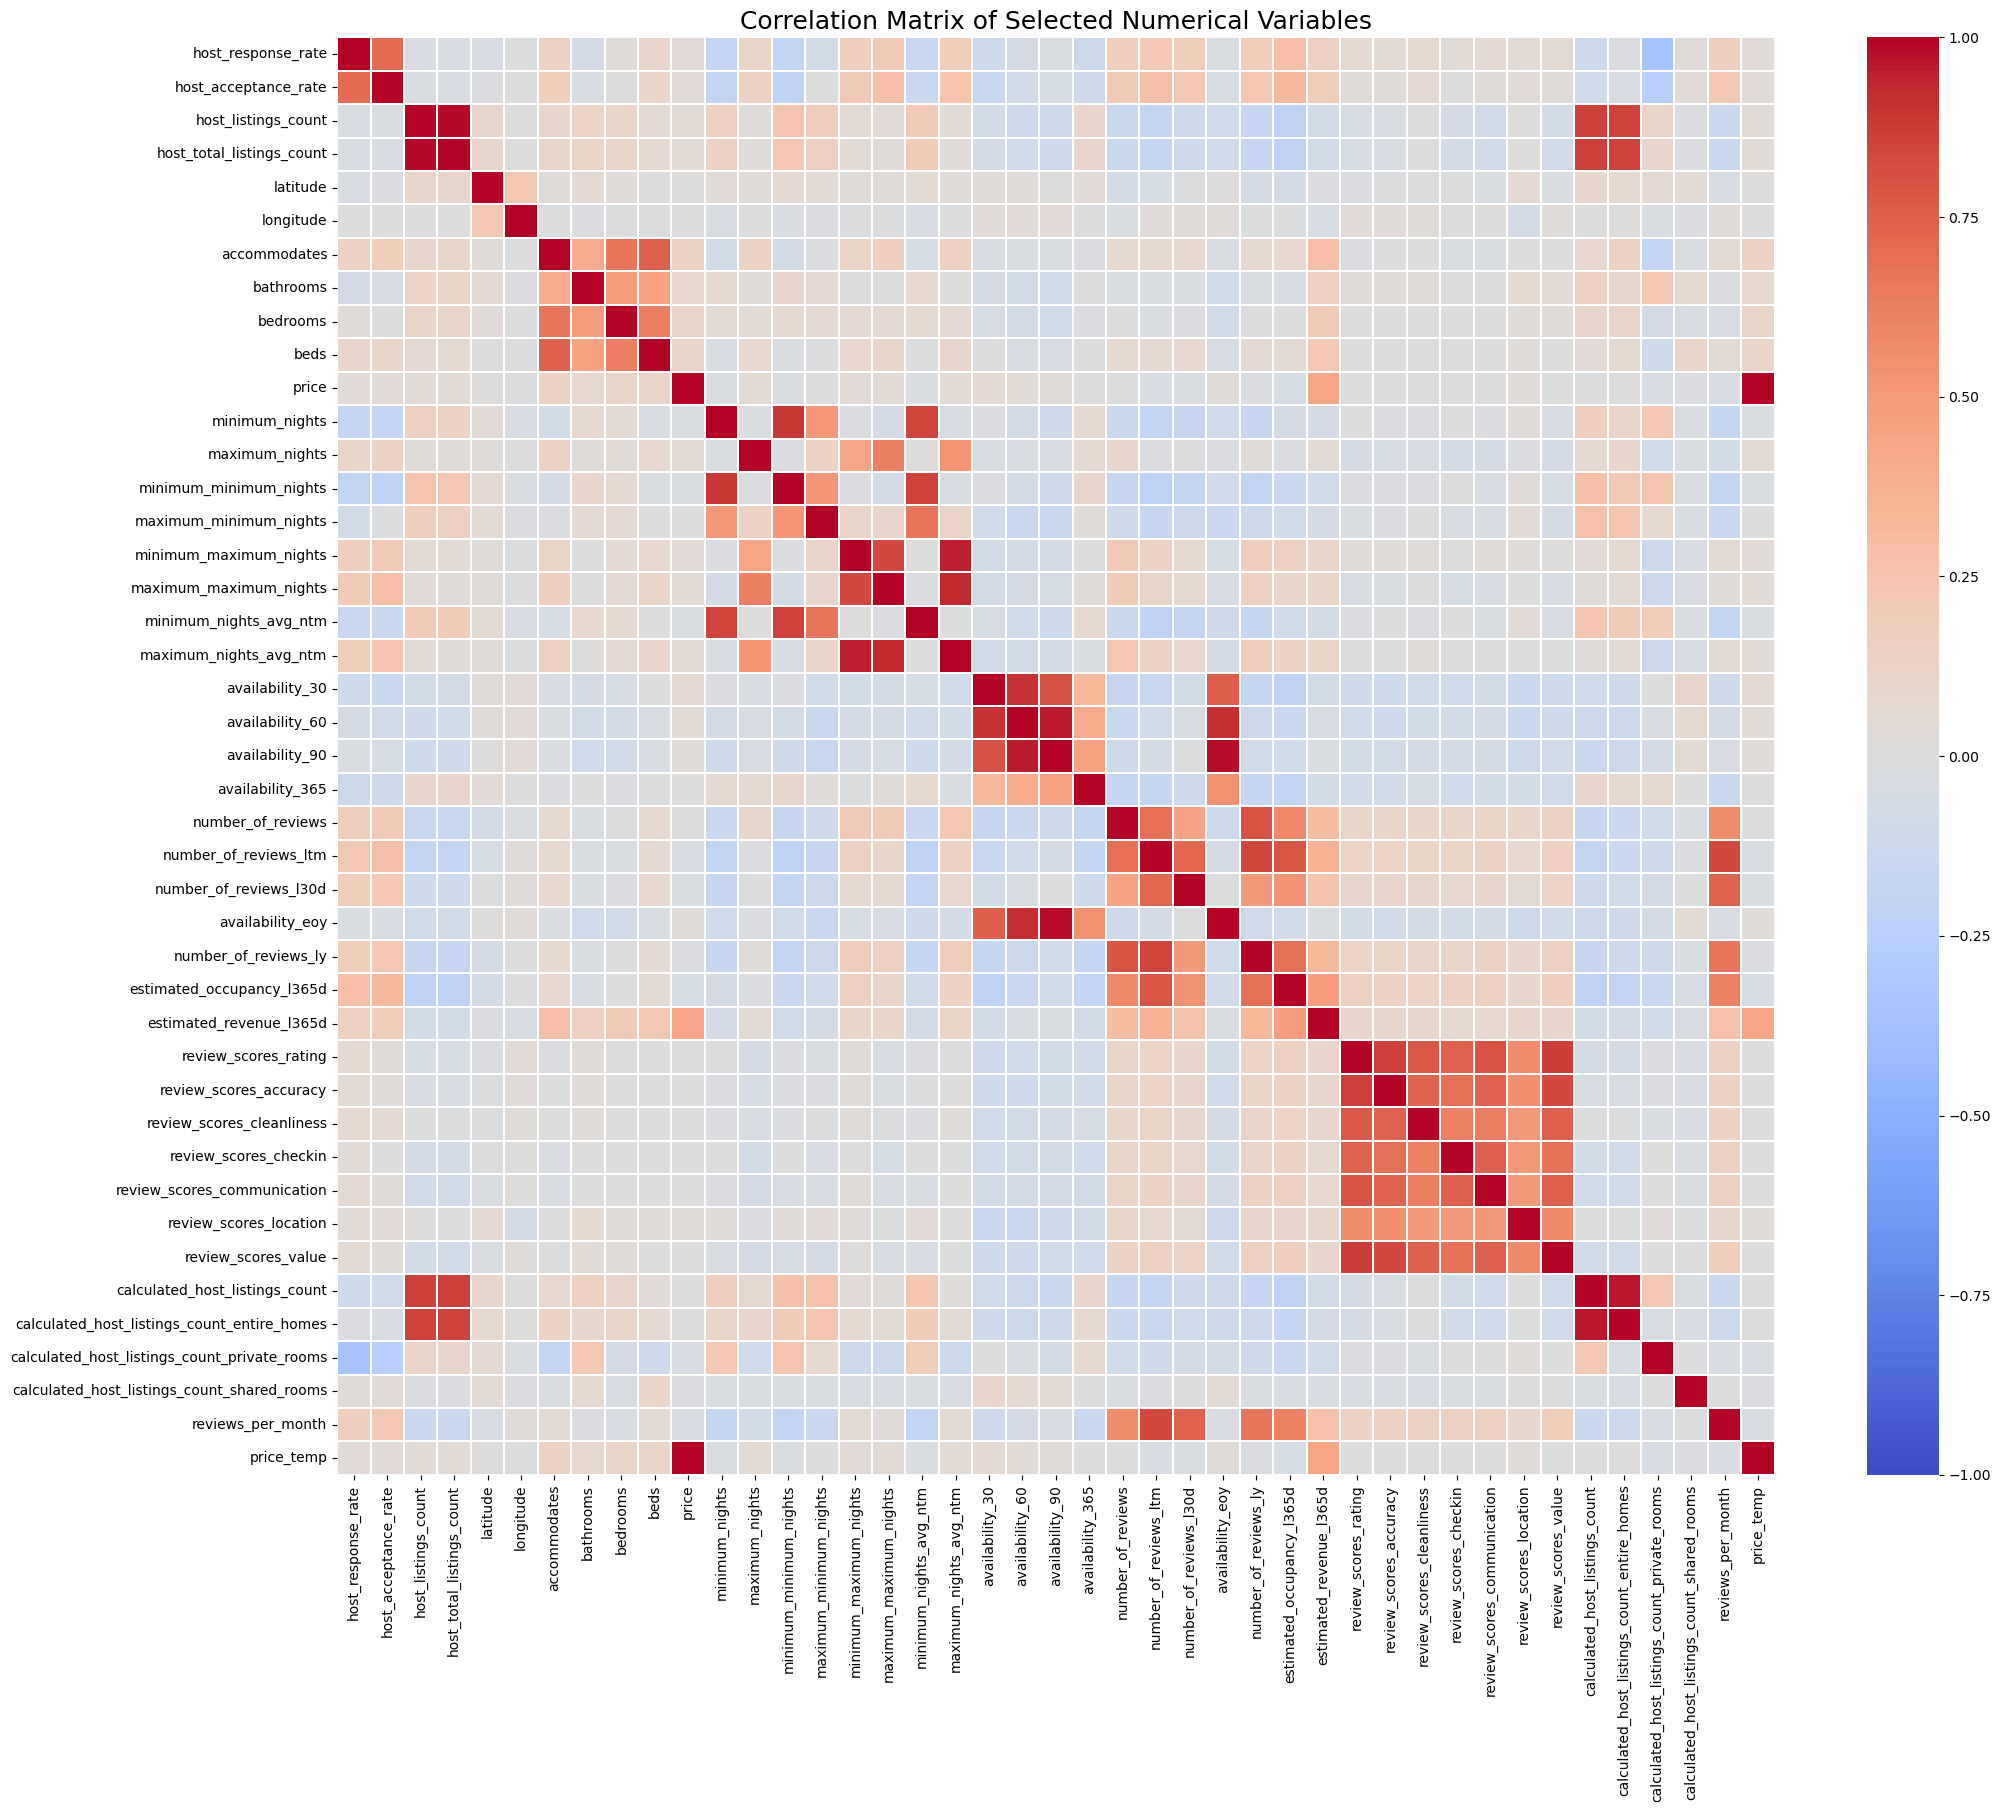

In [21]:
# TODO: Create correlation matrix for numerical variables
# Visualize with a heatmap

cat_cols, num_cols, obj_cols = get_col_types(listings_df)

corr_df = listings_df[num_cols].corr()

plt.figure(figsize=(22, 18))
sns.heatmap(
    corr_df,
    cmap='coolwarm',
    annot=False,
    vmin=-1,
    vmax=1,
    linewidths=0.2,
    square=True
)
plt.title("Correlation Matrix of Selected Numerical Variables", fontsize=18)
plt.tight_layout()
plt.show()


Correlation between PRICE and Review Scores:


review_scores_rating          -0.001694
review_scores_accuracy        -0.000871
review_scores_cleanliness      0.004298
review_scores_checkin         -0.006511
review_scores_communication   -0.010036
review_scores_location         0.027928
review_scores_value           -0.007576
Name: price, dtype: float64

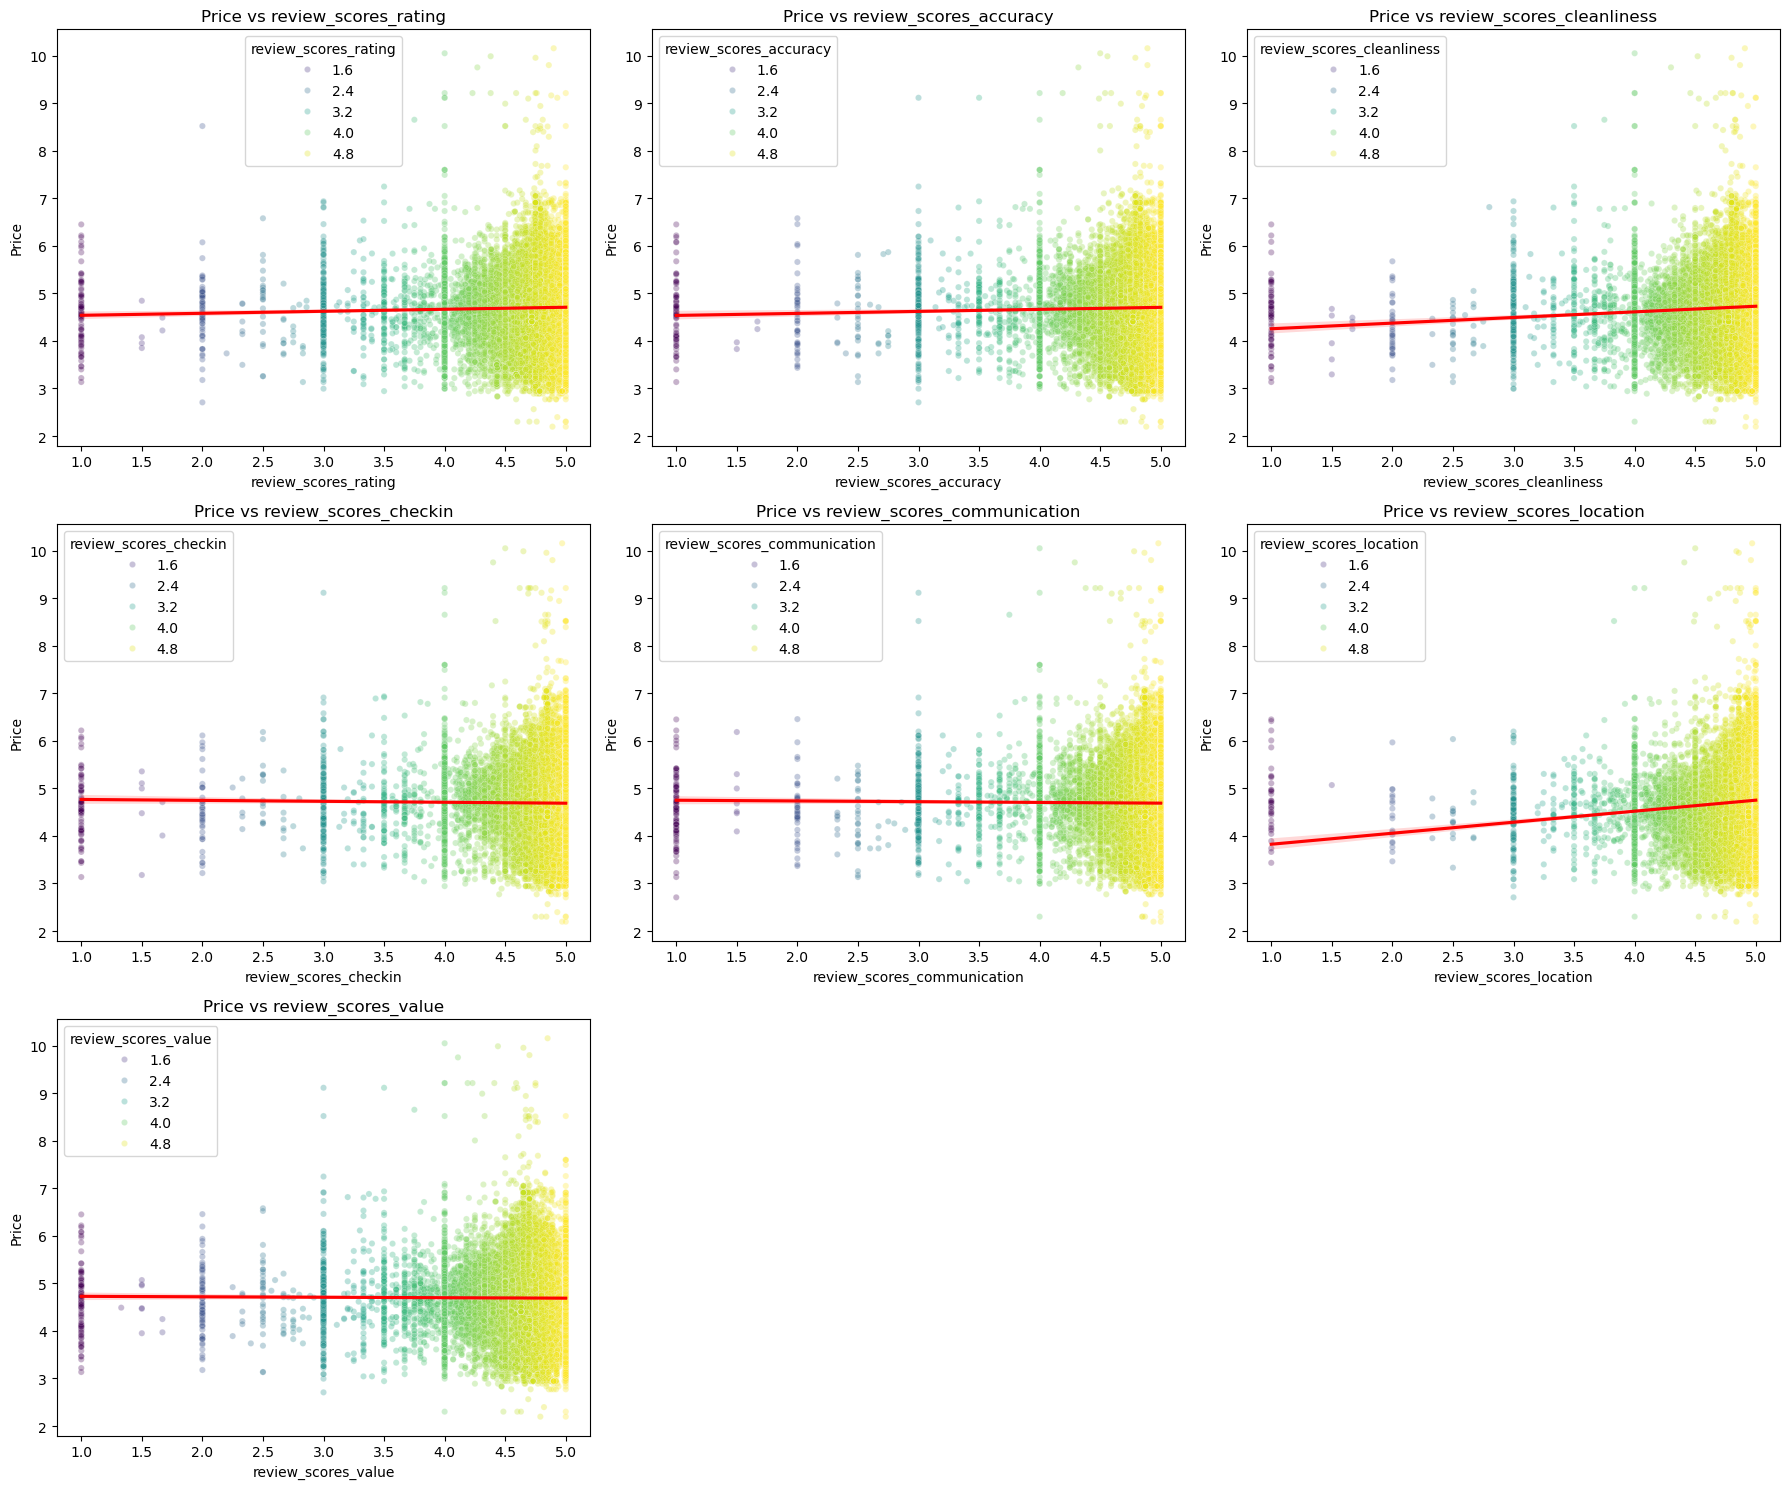

In [22]:
# TODO: Analyze relationship between PRICE and REVIEW SCORES
# Include: scatter plot, correlation, interpretation

review_vars = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

listings_df["price_log"] = np.log1p(listings_df["price"])

# correlations
corrs = (
    listings_df[["price"] + review_vars]
    .corr()["price"]
    .drop("price")
)

print("Correlation between PRICE and Review Scores:")
display(corrs)

# scatter plots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(review_vars):
    ax = axes[i]
    
    sns.scatterplot(
        x=listings_df[col],
        y=listings_df["price_log"],
        alpha=0.3,
        s=20,
        ax=ax,
        hue=listings_df[col],
        palette="viridis"
    )
    
    sns.regplot(
        x=listings_df[col],
        y=listings_df["price_log"],
        scatter=False,
        ax=ax,
        color="red"
    )
    
    ax.set_title(f"Price vs {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Price")

for j in range(len(review_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



**✍️ Insights:**
_Describe the relationship between price and review scores_

Interestingly, price is very weakly related to most review scores, showing a pretty mucho zero correlation with most, with only a couple exceptions: Location is by far the strongest correlation, and this makes sense. Great locations can charge more regardless of the rest of review scores, and people will still keep going there. It seems cleanliness is the next most correlated, however, I get the feeling this is a bit of an inverse relationship. I.e. landlords charge more for additional cleaning services, ergo both price and cleanliness are higher. Finally we can see some very slight correlations between the general review rating, the accuracy score, and price. Very weakly positively correlated, meaning they are basically irrelevant to price, but maybe it would be a different story if we compared to estimated_revenue.

Filtered to active listings: 14,426 rows
Correlation (active only): PRICE vs ESTIMATED REVENUE = 0.7419433392584045
Correlation (active only): PRICE vs ESTIMATED OCCUPANCY = -0.039802691809140346


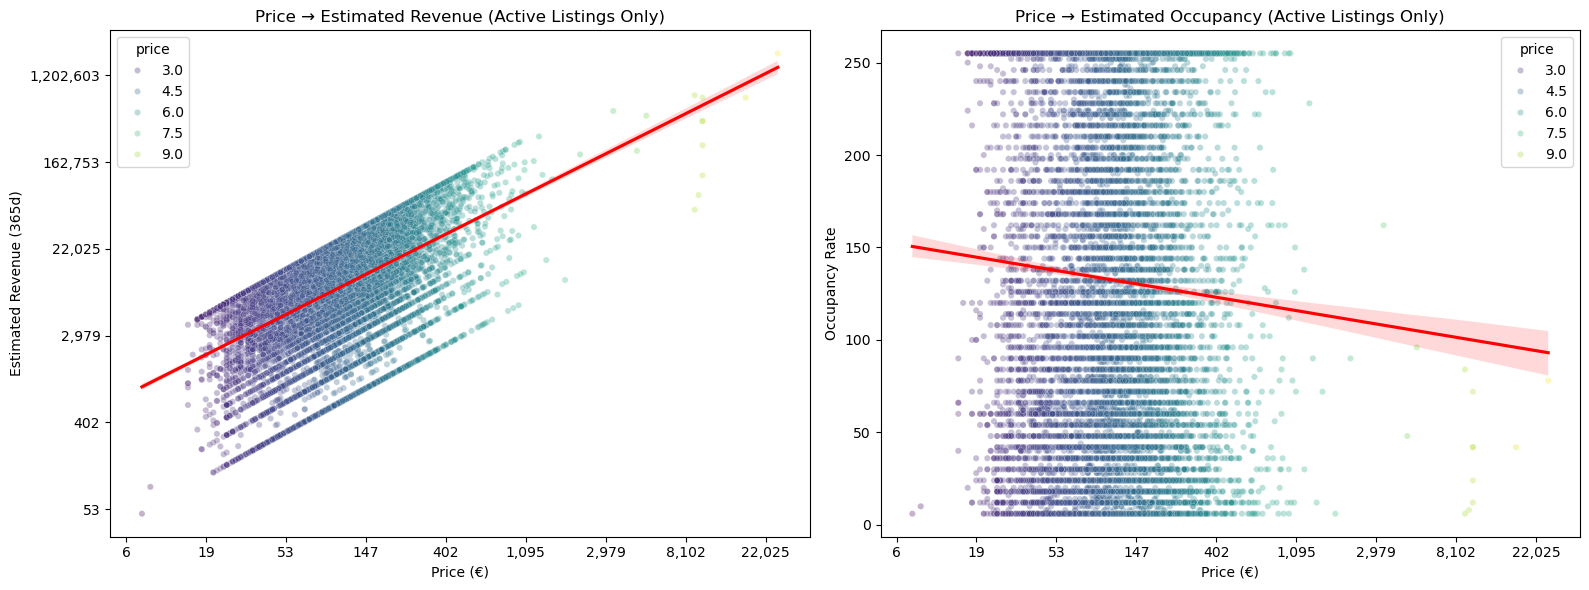

In [23]:
# TODO: Analyze at least 2 more numerical relationships
# price vs estimated_revenue_l365d
# price vs estimated_occupancy_l365d

# Filter active listings: revenue > 0 AND occupancy > 0
active_df = listings_df[
    (listings_df["estimated_revenue_l365d"] > 0) &
    (listings_df["estimated_occupancy_l365d"] > 0)
].copy()

print(f"Filtered to active listings: {len(active_df):,} rows")

# Log-transform internally but keep raw values for labels
price_log = np.log1p(active_df["price"])
revenue_log = np.log1p(active_df["estimated_revenue_l365d"])
occupancy = active_df["estimated_occupancy_l365d"]

# correlations (active only)
corr_price_revenue = active_df[["price", "estimated_revenue_l365d"]].corr().iloc[0,1]
corr_price_occupancy = active_df[["price", "estimated_occupancy_l365d"]].corr().iloc[0,1]

print("Correlation (active only): PRICE vs ESTIMATED REVENUE =", corr_price_revenue)
print("Correlation (active only): PRICE vs ESTIMATED OCCUPANCY =", corr_price_occupancy)

# scatterplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(
    x=price_log,
    y=revenue_log,
    alpha=0.3,
    s=20,
    ax=axes[0],
    hue=price_log,
    palette="viridis"
)
sns.regplot(
    x=price_log,
    y=revenue_log,
    scatter=False,
    ax=axes[0],
    color="red"
)

axes[0].set_title("Price → Estimated Revenue (Active Listings Only)")
axes[0].set_xlabel("Price (€)")
axes[0].set_ylabel("Estimated Revenue (365d)")

# fix ticks to non log
xlog_ticks = axes[0].get_xticks()
axes[0].xaxis.set_major_locator(FixedLocator(xlog_ticks))
axes[0].set_xticklabels([f"{int(np.expm1(x)):,}" for x in xlog_ticks])

ylog_ticks = axes[0].get_yticks()
axes[0].yaxis.set_major_locator(FixedLocator(ylog_ticks))
axes[0].set_yticklabels([f"{int(np.expm1(y)):,}" for y in ylog_ticks])

sns.scatterplot(
    x=price_log,
    y=occupancy,
    alpha=0.3,
    s=20,
    ax=axes[1],
    hue=price_log,
    palette="viridis"
)
sns.regplot(
    x=price_log,
    y=occupancy,
    scatter=False,
    ax=axes[1],
    color="red"
)

axes[1].set_title("Price → Estimated Occupancy (Active Listings Only)")
axes[1].set_xlabel("Price (€)")
axes[1].set_ylabel("Occupancy Rate")

# fix ticks again
xlog_ticks2 = axes[1].get_xticks()
axes[1].xaxis.set_major_locator(FixedLocator(xlog_ticks2))
axes[1].set_xticklabels([f"{int(np.expm1(x)):,}" for x in xlog_ticks2])

plt.tight_layout()
plt.show()


/var/folders/jr/f_1nmytd20v46jvkl2_4c0p80000gn/T/ipykernel_7338/2359355848.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("room_type")["estimated_revenue_l365d"]


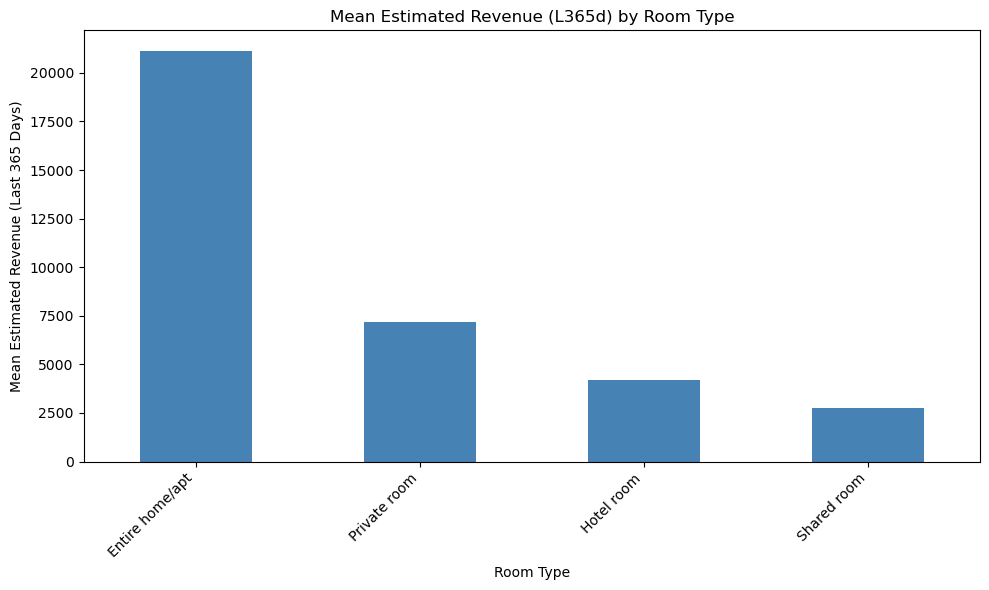

In [24]:
# Graph estimated revenue by room type

df_rev = listings_df[listings_df["estimated_revenue_l365d"] > 0].copy()

mean_rev = (
    df_rev
    .groupby("room_type")["estimated_revenue_l365d"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
mean_rev.plot(kind="bar", color="steelblue")

plt.title("Mean Estimated Revenue (L365d) by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Mean Estimated Revenue (Last 365 Days)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**✍️ Insights:**
_Describe the relationship between price and estimated revenue and estimated occupancy_

Price and Estimated Revenue:

There is a strong positive correlation between price and estimated revenue (correlation around 0.74).
As listing price increases, estimated revenue rises sharply.
The upward trend indicates that higher-priced listings consistently generate more revenue, even when occupancy does not increase.
Also interesting to point out, the spread widens at higher prices meaning expensive listings can earn far more depending on how booked they are.

Price and Estimated Occupancy

The relationship between price and occupancy is very weak and slightly negative (correlation around –0.04).
This suggests that higher prices do not meaningfully reduce occupancy, though there is a small tendency for cheaper listings to fill more nights.
This suggests that price alone does not strongly determine occupancy; other factors (location, quality, host behavior) likely matter more.

In Short:

Revenue scales strongly with price, while occupancy remains relatively stable across price levels.
Strategically, hosts may be able to raise prices without significantly hurting occupancy, leading to higher total revenue.


### 5.2 Categorical vs Numerical Analysis

count        mean  median         std   min      max
room_type                                                            
Entire home/apt  13648  184.980876   129.0  564.375520   9.0  25654.0
Hotel room          41  151.097561   152.0   63.683909  31.0    347.0
Private room      5116   84.271892    50.0  199.709181   8.0   8900.0
Shared room        148   52.864865    30.0  116.739879  15.0   1000.0

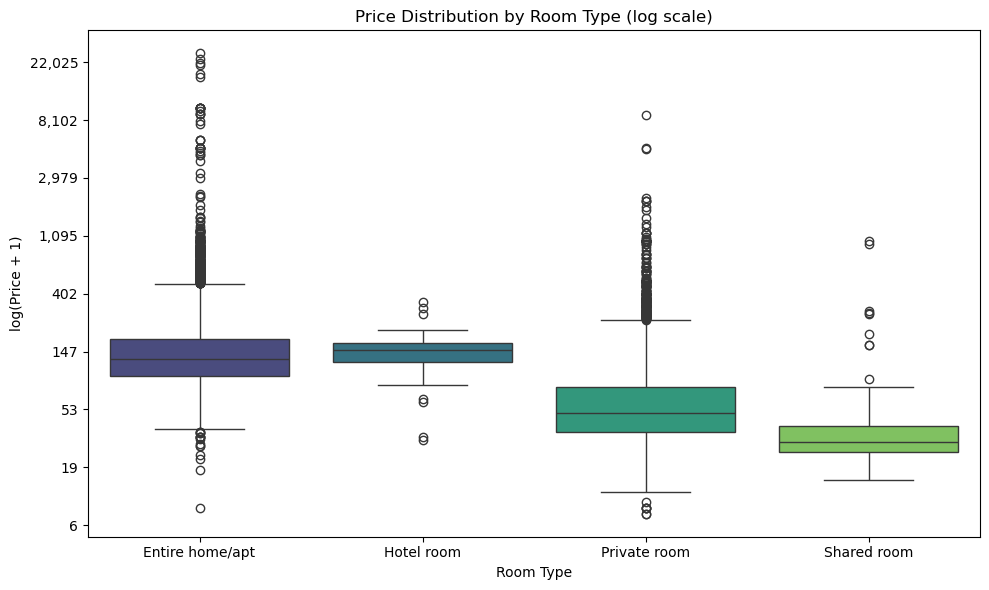

In [25]:
price_by_room = (
    listings_df.groupby("room_type", observed=True)["price"]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .sort_values("mean", ascending=False)
)

display(price_by_room)

# boxplot of price by room type (log scale with non-log labels)
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="room_type",
    y=np.log1p(listings_df["price"]),
    data=listings_df,
    hue='room_type',
    palette="viridis"
)

plt.title("Price Distribution by Room Type (log scale)")
plt.ylabel("log(Price + 1)")
plt.xlabel("Room Type")

yticks = ax.get_yticks()
ax.yaxis.set_major_locator(FixedLocator(yticks))
ax.set_yticklabels([f"{int(np.expm1(y)):,}" for y in yticks])

plt.tight_layout()
plt.show()

**✍️ Insights:**
_How does room type affect pricing?_

Entire home/apartment has the highest prices

Mean price ≈ 185

Very wide spread 

This room type consistently sits at the top of the pricing hierarchy because it offers full privacy and larger space.

===================================================================================================

Hotel rooms are the second most expensive

Mean ≈ 151

While fewer in number, hotel rooms tend to have relatively high prices due to service-level expectations and central locations.

===================================================================================================

Private rooms are moderately priced

Mean ≈ 84

This is almost half the price of entire homes

Boxplot shows lower variance, meaning pricing is more consistent for this category

===================================================================================================

Shared rooms have the lowest prices

Mean ≈ 52

Also the smallest variation in pricing

Reflects limited privacy and often budget-oriented travelers.


neighbourhood_cleansed
Embajadores        165722
Universidad        135042
Palacio            119307
Sol                113693
Cortes              76091
Justicia            61781
Palos de Moguer     34472
Guindalera          14909
Goya                13102
Pacífico            13001
Name: number_of_reviews, dtype: int64

total_reviews  avg_reviews_per_listing  \
neighbourhood_cleansed                                           
Embajadores                    165722                83.487154   
Universidad                    135042                78.971930   
Palacio                        119307                80.341414   
Sol                            113693               102.982790   
Cortes                          76091                88.170336   
Justicia                        61781                65.238648   
Palos de Moguer                 34472               114.524917   
Guindalera                      14909                49.204620   
Goya                            13102                41.593651   
Pacífico                        13001                60.752336   

                        median_reviews_per_listing  total_recent_reviews  \
neighbourhood_cleansed                                                     
Embajadores                                   28.0                  2664   
Universidad                                   28.0                  2236   
Palacio                                       30.0                  1905   
Sol                                           40.0                  1750   
Cortes                                        35.0                  1080   
Justicia                                      25.0                  1187   
Palos de Moguer                               48.0                   635   
Guindalera                                    10.0                   296   
Goya                                           7.0                   280   
Pacífico                                      13.0                   221   

                        listings  
neighbourhood_cleansed            
Embajadores                 1985  
Universidad                 1710  
Palacio                     1485  
Sol                         1104  
Cortes                       863  
Justicia                     947  
Palos de Moguer              301  
Guindalera                   303  
Goya                         315  
Pacífico                     214

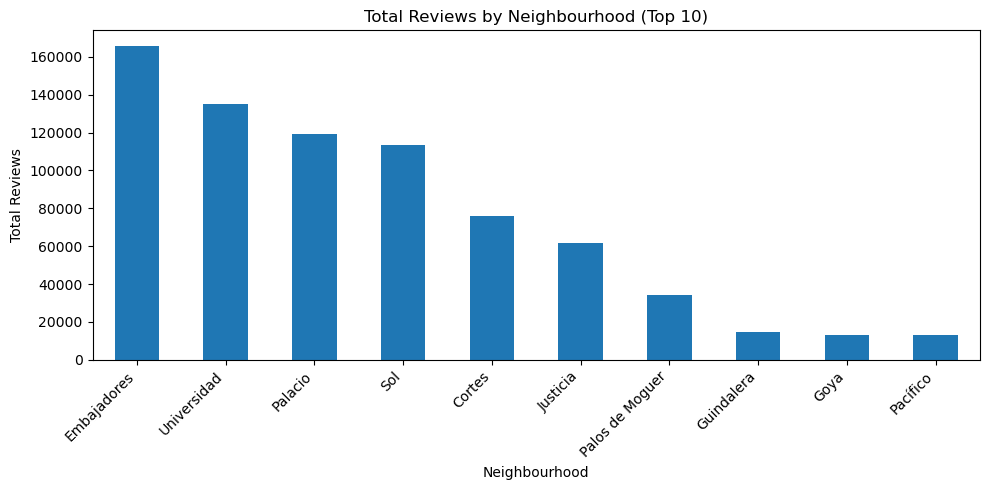

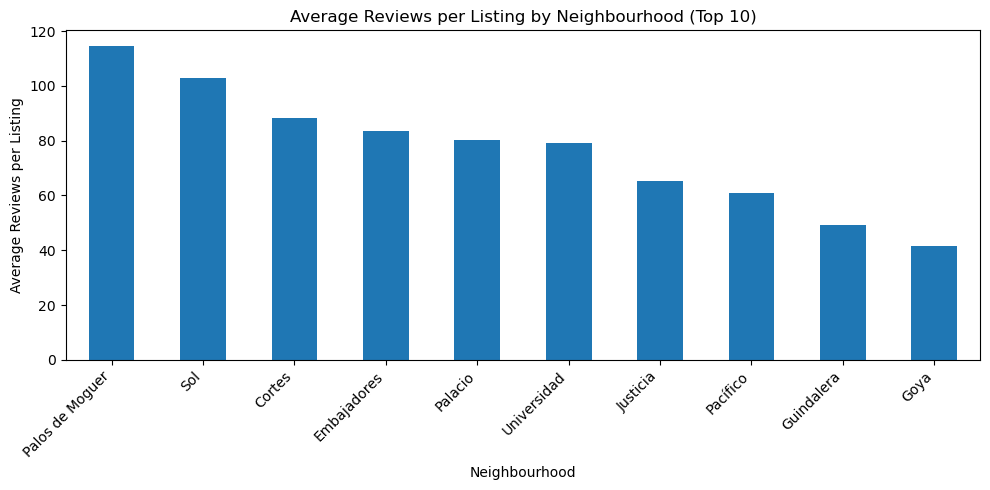

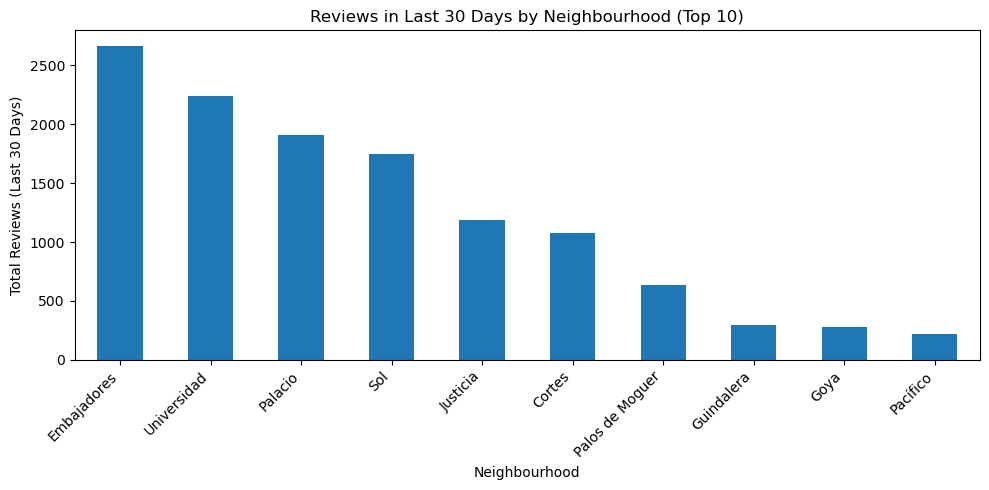

In [26]:
# TODO: Analyze REVIEWS by NEIGHBOURHOOD (top 10-15 neighbourhoods)
# identify top neighbourhoods by number of reviews

neigh_review_counts = (
    listings_df.groupby("neighbourhood_cleansed")["number_of_reviews"]
    .sum()
    .sort_values(ascending=False)
)

n = 10
top_neigh = neigh_review_counts.head(n).index

filtered_df = listings_df[listings_df["neighbourhood_cleansed"].isin(top_neigh)].copy()
display(neigh_review_counts.head(n))


# summary statistics for these neighbourhoods

neigh_summary = (
    filtered_df.groupby("neighbourhood_cleansed")
    .agg(
        total_reviews=("number_of_reviews", "sum"),
        avg_reviews_per_listing=("number_of_reviews", "mean"),
        median_reviews_per_listing=("number_of_reviews", "median"),
        total_recent_reviews=("number_of_reviews_l30d", "sum"),
        listings=("id", "count")
    )
    .sort_values("total_reviews", ascending=False)
)

display(neigh_summary)


# reviews by neighbourhood

plt.figure(figsize=(10, 5))
neigh_summary["total_reviews"].plot(kind="bar")
plt.title("Total Reviews by Neighbourhood (Top {})".format(n))
plt.xlabel("Neighbourhood")
plt.ylabel("Total Reviews")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# average reviews per listing by neighbourhood
neigh_summary_avg = neigh_summary.sort_values("avg_reviews_per_listing", ascending=False)

plt.figure(figsize=(10, 5))
neigh_summary_avg["avg_reviews_per_listing"].plot(kind="bar")
plt.title("Average Reviews per Listing by Neighbourhood (Top {})".format(n))
plt.xlabel("Neighbourhood")
plt.ylabel("Average Reviews per Listing")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# reviews (last 30 days) per neighbourhood
neigh_summary_recent = neigh_summary.sort_values("total_recent_reviews", ascending=False)

plt.figure(figsize=(10, 5))
neigh_summary_recent["total_recent_reviews"].plot(kind="bar")
plt.title("Reviews in Last 30 Days by Neighbourhood (Top {})".format(n))
plt.xlabel("Neighbourhood")
plt.ylabel("Total Reviews (Last 30 Days)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**✍️ Analysis:**
_What differences do you observe?_

1. Total recent reviews vary significantly by neighbourhood

From the “Reviews in Last 30 Days (Top 10)” chart:

Embajadores leads with the highest total recent reviews (~2500+).

Universidad, Palacio, and Sol also show very high review activity.

Neighbourhoods such as Goya and Pacifico have much lower review volumes.

➤ Interpretation

High total review counts indicate neighbourhoods with:

High tourism activity

High listing density

These areas are likely central, popular, and walkable.

2. Average reviews per listing show a different ranking

In the “Average Reviews per Listing (Top 10)” plot:

Palos de Moguer, Sol, Cortes, Embajadores, and Palacio show the highest average reviews per listing.

This means listings in these neighbourhoods not only attract tourists but also generate high guest engagement per property.

➤ Interpretation

Neighbourhoods with high average reviews per listing reflect:

Mature listings with long hosting history

High demand relative to supply

Strong repeat or steady guest flow

3. Combined interpretation
Some neighbourhoods rank high in both total reviews and average reviews per listing:
Embajadores, Sol, Palacio, Cortes
 These neighbourhoods appear to be the strongest performers overall, suggesting:


High visibility


Strong tourist preference


Well-established listings with higher guest interaction


Neighbourhoods lower in both charts likely have:
Fewer listings


Lower tourism demand


Newer hosts with fewer accumulated reviews


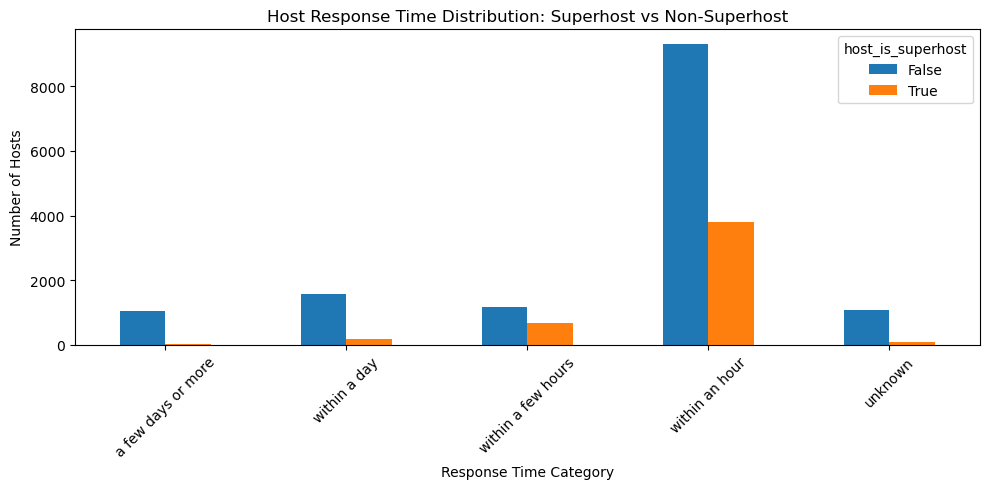

<Figure size 600x500 with 0 Axes>

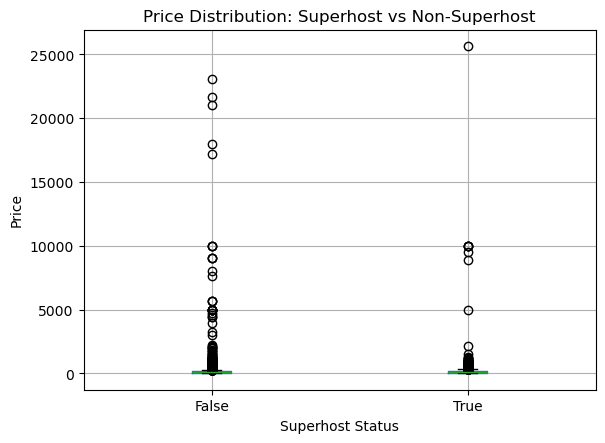

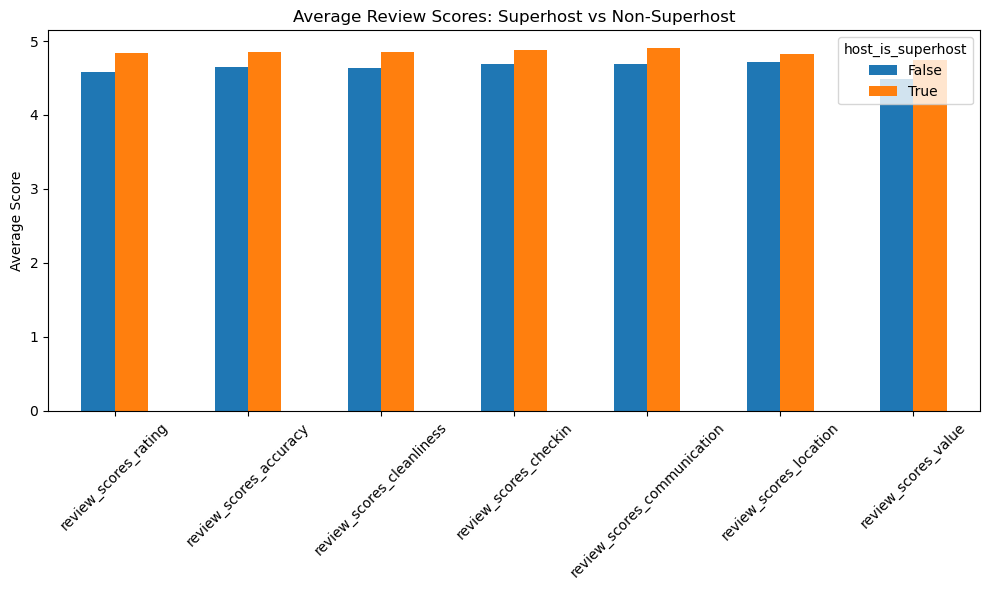

<Figure size 600x500 with 0 Axes>

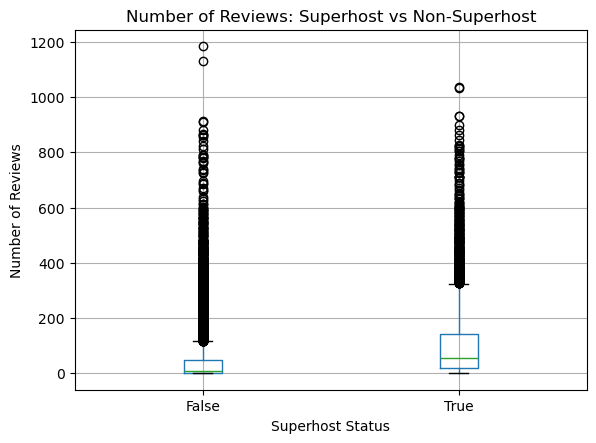

In [27]:
# TODO: Compare SUPERHOST vs NON-SUPERHOST performance
# Metrics: price, review scores, number of reviews, response time

review_cols = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value"
]

# resopnse time
response_time_counts = (
    listings_df
    .groupby(["host_is_superhost", "host_response_time"], observed=True)
    .size()
    .unstack(fill_value=0)
)

response_time_counts.T.plot(kind="bar", figsize=(10,5))
plt.title("Host Response Time Distribution: Superhost vs Non-Superhost")
plt.xlabel("Response Time Category")
plt.ylabel("Number of Hosts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# price
plt.figure(figsize=(6,5))
listings_df.boxplot(column="price", by="host_is_superhost")
plt.title("Price Distribution: Superhost vs Non-Superhost")
plt.suptitle("")
plt.xlabel("Superhost Status")
plt.ylabel("Price")
plt.show()

# review scores
mean_reviews = listings_df.groupby("host_is_superhost")[review_cols].mean()

mean_reviews.T.plot(kind="bar", figsize=(10,6))
plt.title("Average Review Scores: Superhost vs Non-Superhost")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# number of reviews
plt.figure(figsize=(6,5))
listings_df.boxplot(column="number_of_reviews", by="host_is_superhost")
plt.title("Number of Reviews: Superhost vs Non-Superhost")
plt.suptitle("")
plt.xlabel("Superhost Status")
plt.ylabel("Number of Reviews")
plt.show()

**✍️ Superhost Analysis:**
_What differences do you observe between superhosts and regular hosts?_

1) Pricing differences:
Superhosts tend to have slightly higher average prices than regular hosts. The difference is small but consistent, indicating that the superhost badge may allow hosts to charge a modest premium due to increased credibility and perceived service quality.

2) Review score differences:
Across all review score dimensions (accuracy, cleanliness, communication, location, check-in, value), superhosts consistently score higher than non-superhosts. Although the differences are small (0.05–0.15 points), they are systematic and align with expectations of more reliable guest experiences.

3) Review volume differences:
Superhosts typically receive more reviews. This indicates higher demand and more active hosting, consistent with the performance thresholds required to maintain superhost status.

4) Revenue and occupancy patterns:
In the bivariate plots, superhost listings cluster toward higher estimated annual revenue and higher occupancy levels.
This suggests that superhost status correlates not only with listing quality but also with stronger market performance.

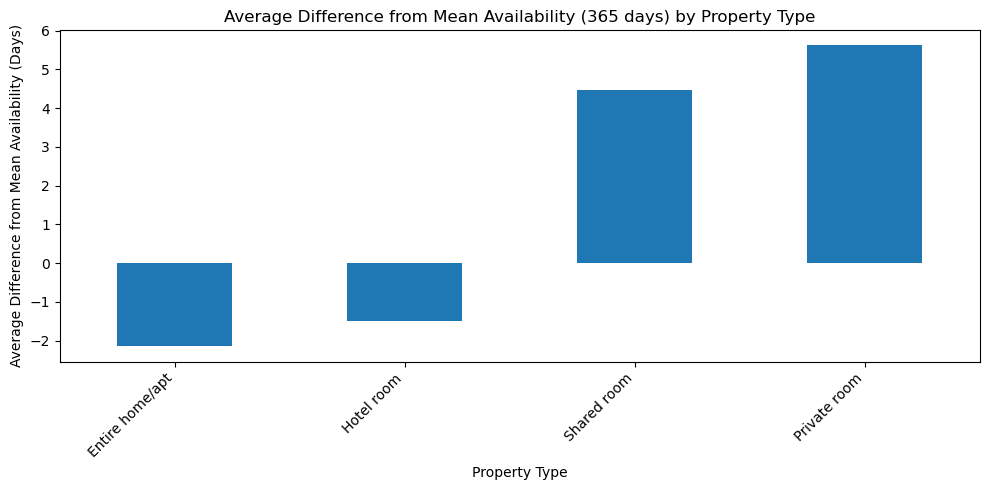

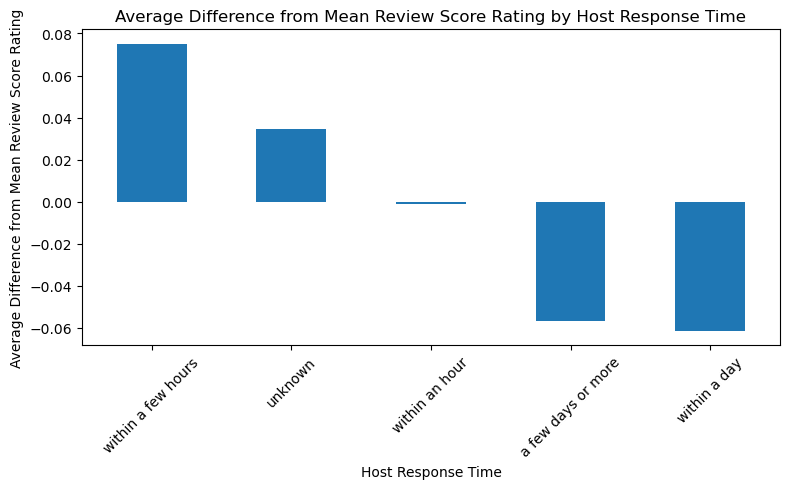

In [28]:
# TODO: Analyze at least 2 more categorical vs numerical relationship
# room_type vs availability_365
room_avail = (
    listings_df.groupby("room_type", observed=True)["availability_365"]
    .mean()
    .sort_values(ascending=True)
)

global_mean_avail = listings_df["availability_365"].mean()

room_avail_diff = room_avail - global_mean_avail

# bar chart
plt.figure(figsize=(10,5))
room_avail_diff.plot(kind="bar")
plt.title("Average Difference from Mean Availability (365 days) by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Difference from Mean Availability (Days)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# review_scores_rating vs host_response_time
resp_rating = (
    listings_df.groupby("host_response_time", observed=True)["review_scores_rating"]
    .mean()
    .sort_values(ascending=False)
)
 
global_mean_rating = listings_df["review_scores_rating"].mean()

resp_rating_diff = resp_rating - global_mean_rating

# bar chart of average rating
plt.figure(figsize=(8,5))
resp_rating_diff.plot(kind="bar")
plt.title("Average Difference from Mean Review Score Rating by Host Response Time")
plt.xlabel("Host Response Time")
plt.ylabel("Average Difference from Mean Review Score Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**✍️ Analysis:**
_What differences do you observe?_


**Availability Differences by Property Type**

There are only minor differences in average availability across property types. For example:

Private rooms and shared rooms show slightly higher availability, suggesting they may be easier to book or have lower demand relative to supply.

Entire homes/apartments and hotel rooms show slightly lower availability, which may indicate higher demand or more frequent bookings.

Overall, availability is relatively consistent across property types with no extreme gaps.


**Review Score Differences by Host Response Time**
 
Review scores vary modestly depending on how fast hosts respond:

Hosts responding “within a few hours” or “within an hour” have the highest average review ratings, reflecting positive guest perception of responsiveness.

Hosts responding “within a day” or “a few days or more” show slightly lower ratings, though still high overall.

The “unknown” category performs strangely well, which leads to the conclusion that it's likely they organize themselves off-platform.


**Overall**: Faster host response times correlate with slightly higher review scores, while property type shows only minor variation in availability, with shared and private rooms generally available more days per year. The differences are slightly visible.


### 5.3 Categorical vs Categorical Analysis

room_type                     Entire home/apt  Hotel room  Private room  \
neighbourhood_group_cleansed                                              
Centro                                   6394          31          1589   
Salamanca                                1086           0           230   
Tetuán                                    962           0           303   
Chamberí                                  858           6           331   
Arganzuela                                653           1           246   
Retiro                                    504           0           223   
Chamartín                                 521           0           164   
Carabanchel                               378           0           277   
Ciudad Lineal                             384           1           235   
Puente de Vallecas                        297           0           250   
Moncloa - Aravaca                         306           0           200   
Latina                                    217           0           221   
Hortaleza                                 259           2           154   
Usera                                     215           0           172   
San Blas - Canillejas                     220           0           162   
Fuencarral - El Pardo                     142           0            88   
Villaverde                                 73           0            95   
Moratalaz                                  37           0            81   
Barajas                                    64           0            34   
Villa de Vallecas                          51           0            25   
Vicálvaro                                  27           0            36   

room_type                     Shared room  
neighbourhood_group_cleansed               
Centro                                 80  
Salamanca                               0  
Tetuán                                 38  
Chamberí                                1  
Arganzuela                              5  
Retiro                                  0  
Chamartín                               4  
Carabanchel                             6  
Ciudad Lineal                           0  
Puente de Vallecas                      4  
Moncloa - Aravaca                       3  
Latina                                  0  
Hortaleza                               0  
Usera                                   3  
San Blas - Canillejas                   0  
Fuencarral - El Pardo                   0  
Villaverde                              1  
Moratalaz                               0  
Barajas                                 3  
Villa de Vallecas                       0  
Vicálvaro                               0

<Figure size 1200x600 with 0 Axes>

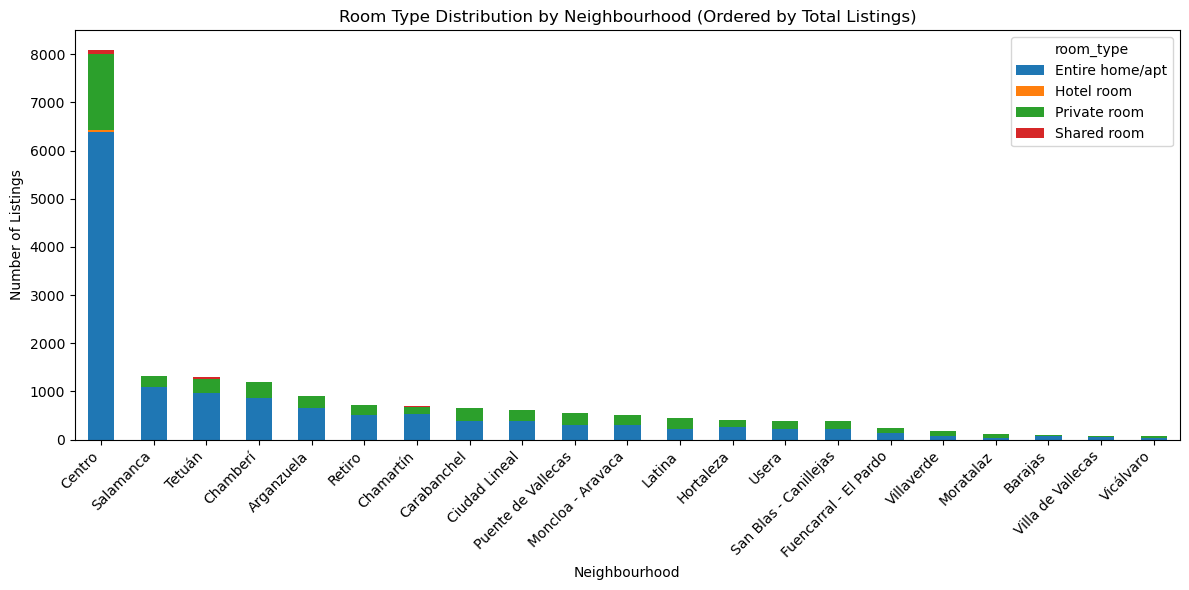

In [29]:
# TODO: Cross-tabulation and visualization
# room_type vs neighbourhood_cleansed
room_neigh_ct = pd.crosstab(
    listings_df["neighbourhood_group_cleansed"],
    listings_df["room_type"]
)
room_neigh_ct["total"] = room_neigh_ct.sum(axis=1)
room_neigh_ct = room_neigh_ct.sort_values("total", ascending=False)

# remove helper column before plotting
room_neigh_ct_sorted = room_neigh_ct.drop(columns="total")
display(room_neigh_ct_sorted)

plt.figure(figsize=(12, 6))
room_neigh_ct_sorted.plot(kind="bar", stacked=True, figsize=(12,6))

plt.title("Room Type Distribution by Neighbourhood (Ordered by Total Listings)")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



**✍️ Analysis:**
_What differences do you observe?_

1. Centro overwhelmingly dominates the market

Centro has by far the highest number of listings, more than 8,000.

It has a large supply of:

Entire homes/apartments (the majority)

A significant number of private rooms

Small counts of hotel and shared rooms

This reflects Centro’s position as the central tourism hub with dense Airbnb activity.

2. Salamanca, Tetuan, Chamberí, and Arganzuela form a strong second tier
These neighbourhoods have 1,000–1,300 listings each, far below Centro but still major contributors.


Across all of them:


Entire homes/apartments remain the dominant room type


Private rooms show a consistent secondary presence


This indicates strong participation from both full-property hosts and room-rental hosts.
3. Most other neighbourhoods have moderate to low Airbnb activity
From Retiro onward, listing counts drop to 600 or fewer, and gradually decline across the remaining neighbourhoods.
Still, the pattern remains consistent:


Entire homes dominate


Private rooms appear regularly but in smaller numbers


Hotel rooms and shared rooms remain tiny fractions everywhere
4. Entire home/apartment is the dominant room type in every neighbourhood
Across all neighbourhoods, regardless of size:
The blue bars (entire homes) are the largest category.


This suggests Airbnb in this city is primarily used for:


Full-apartment rentals


Tourism stays


Professional or semi-professional hosting setups
5. Private rooms are the second most common and fairly evenly distributed
The green bars (private rooms) are present in every neighbourhood.


Even though private rooms do not exceed entire homes in any area, their presence is consistent.


This reflects a mix of:


Residents renting extra space


Budget-friendly options for travelers
6. Hotel rooms and shared rooms are very rare
Hotel rooms (orange) and shared rooms (red) make up only tiny slivers of the distribution.


This indicates:


Limited participation from traditional hotels on Airbnb


Low demand or supply for shared-room arrangements in this market


### 5.4 Advanced Multivariate Analysis

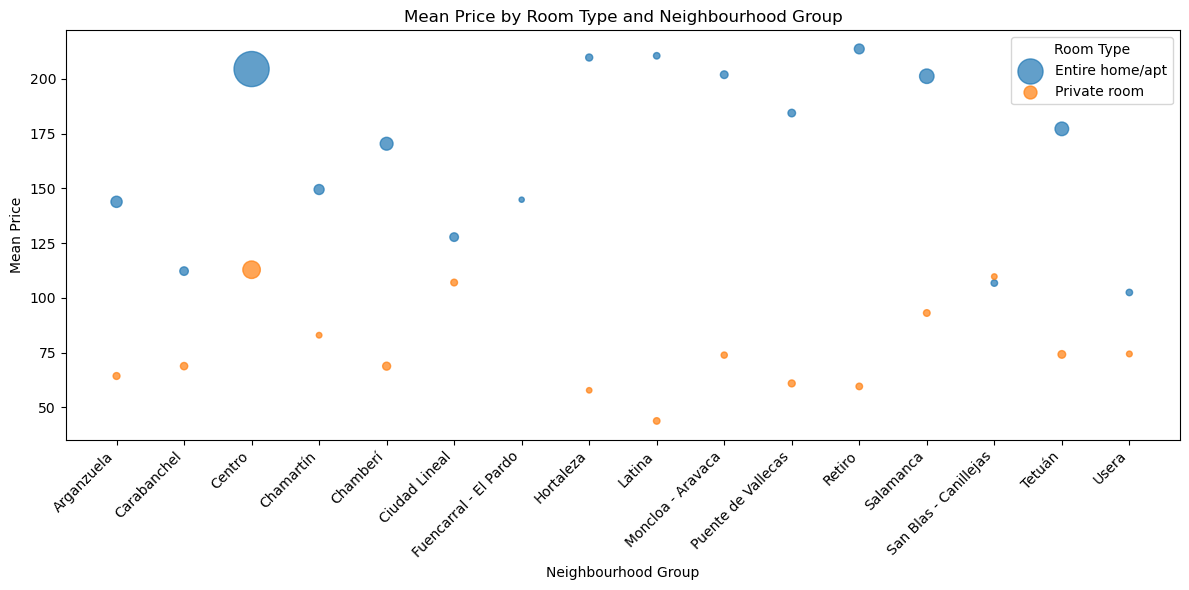

In [30]:
# TODO: Create advanced visualizations exploring 3+ variables
# Examples:

# price by room type and neighbourhood group (using color/size)
summary_1 = (
    listings_df
    .groupby(["neighbourhood_group_cleansed", "room_type"], observed=True)
    ["price"]
    .agg(["mean", "median", "count"])
    .sort_values("mean", ascending=False)
)

summary_1 = summary_1[summary_1["count"] > 100]
summary_1 = summary_1.sort_values("mean", ascending=False)

# group means
mean_price_df = (
    listings_df
    .groupby(["neighbourhood_group_cleansed", "room_type"], observed=True)
    .agg(
        mean_price=("price", "mean"),
        count=("price", "count")
    )
    .reset_index()
)

# filter rows with less than 100 count
mean_price_df = mean_price_df[mean_price_df["count"] > 100]

# scatter plot
plt.figure(figsize=(12,6))

room_types = mean_price_df["room_type"].unique()
neigh_groups = mean_price_df["neighbourhood_group_cleansed"].unique()

for rt in room_types:
    subset = mean_price_df[mean_price_df["room_type"] == rt]
    plt.scatter(
        subset["neighbourhood_group_cleansed"],
        subset["mean_price"],
        s=subset["count"] * 0.1,   # optional: dot size scales by sample size
        alpha=0.7,
        label=rt
    )

plt.title("Mean Price by Room Type and Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Mean Price")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

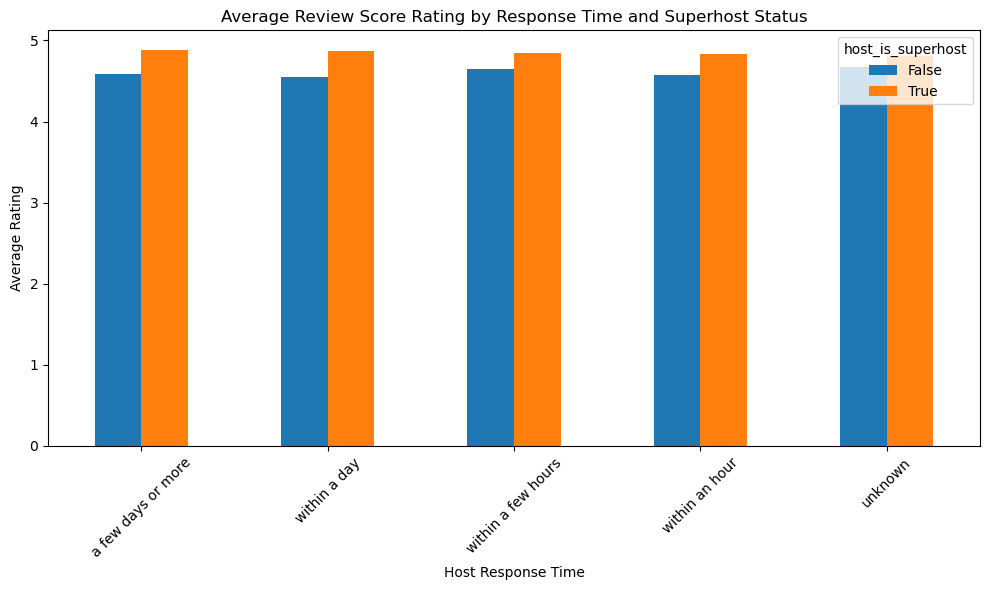

In [31]:
# host_response_time vs host_is_superhost vs review_scores_rating

summary_2 = (
    listings_df
    .groupby(["host_response_time", "host_is_superhost"], observed=True)
    ["review_scores_rating"]
    .agg(["mean", "median", "count"])
    .sort_values("mean", ascending=False)
)

pivot_2 = (
    listings_df
    .pivot_table(
        index="host_response_time",
        columns="host_is_superhost",
        values="review_scores_rating",
        aggfunc="mean",
        observed=True
    )
)

plt.figure(figsize=(10,6))
pivot_2.plot(kind="bar", figsize=(10,6))

plt.title("Average Review Score Rating by Response Time and Superhost Status")
plt.xlabel("Host Response Time")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

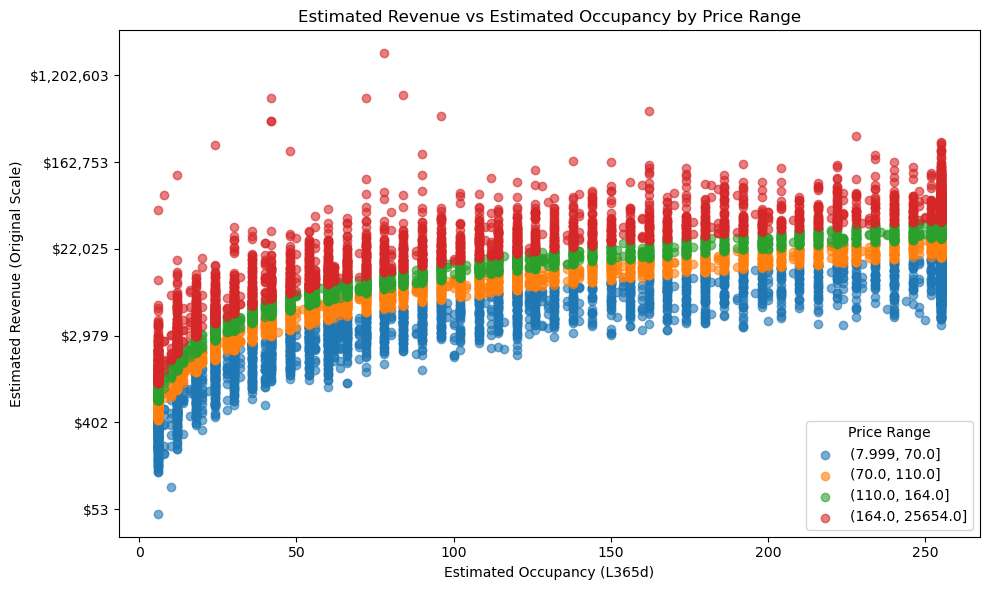

In [32]:
# price_range vs estimated_revenue_l365d vs estimated_occupancy_l365d

# func to fix the ticks on the graphs
def unlog_formatter(tick, pos):
    return f"${int(np.expm1(tick)):,}"

# log est revenue
listings_df["est_revenue_log"] = np.log1p(
        listings_df["estimated_revenue_l365d"].clip(lower=0)
    )

# filter active listings
active_df = listings_df[
    (listings_df["estimated_revenue_l365d"] > 0) &
    (listings_df["estimated_occupancy_l365d"] > 0)
].copy()

# log est revenue
active_df["est_revenue_log"] = np.log1p(
    active_df["estimated_revenue_l365d"]
)

summary_3 = (
    active_df
    .groupby("price_range", observed=True)
    .agg(
        avg_revenue=("estimated_revenue_l365d", "mean"),
        median_revenue=("estimated_revenue_l365d", "median"),
        avg_revenue_log=("est_revenue_log", "mean"),
        median_revenue_log=("est_revenue_log", "median"),
        avg_occupancy=("estimated_occupancy_l365d", "mean"),
        median_occupancy=("estimated_occupancy_l365d", "median"),
        count=("id", "count")
    )
    .sort_values("avg_revenue_log", ascending=False)
)

# scatterplot
plt.figure(figsize=(10,6))

for category, subset in active_df.groupby("price_range", observed=True):
    plt.scatter(
        subset["estimated_occupancy_l365d"],
        subset["est_revenue_log"],
        label=category,
        alpha=0.6
    )

plt.title("Estimated Revenue vs Estimated Occupancy by Price Range")
plt.xlabel("Estimated Occupancy (L365d)")
plt.ylabel("Estimated Revenue (Original Scale)")

ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(unlog_formatter))

plt.legend(title="Price Range")
plt.tight_layout()
plt.show()


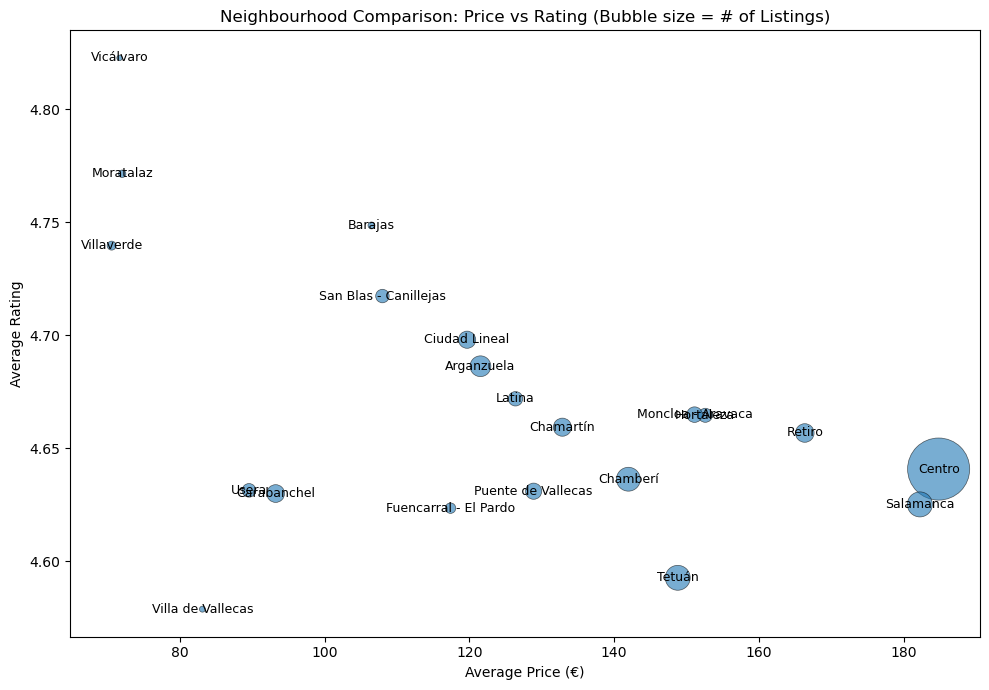

In [33]:
# plot to compare ratings with price

import plotly.express as px

neigh_stats = listings_df.groupby("neighbourhood_group_cleansed").agg(
    avg_price = ("price", "mean"),
    median_price = ("price", "median"),
    avg_rating = ("review_scores_rating", "mean"),
    count_listings = ("id", "count")
).sort_values("avg_price", ascending=False).reset_index()

plt.figure(figsize=(10, 7))

# bubble sizes scaled
sizes = neigh_stats["count_listings"] / neigh_stats["count_listings"].max() * 2000

plt.scatter(
    neigh_stats["avg_price"],
    neigh_stats["avg_rating"],
    s=sizes,
    alpha=0.6,
    edgecolors="black",
    linewidth=0.5
)

# labels with the neighbourhood name
for i in range(len(neigh_stats)):
    plt.text(
        neigh_stats["avg_price"].iloc[i],
        neigh_stats["avg_rating"].iloc[i],
        neigh_stats["neighbourhood_group_cleansed"].iloc[i],
        fontsize=9,
        ha="center",
        va="center"
    )

plt.xlabel("Average Price (€)")
plt.ylabel("Average Rating")
plt.title("Neighbourhood Comparison: Price vs Rating (Bubble size = # of Listings)")

plt.tight_layout()
plt.show()


### ✍️ Summary of Bivariate/Multivariate Analysis:
_What are the most important relationships you discovered?_

**Key Correlations:**

Prices vary strongly by neighbourhood, with central/high-income areas showing the highest averages.
Occupancy and estimated revenue are tightly linked—higher occupancy consistently drives higher revenue.
Superhosts receive higher review scores across all response-time categories.

**Important Patterns:**

Room type distribution differs clearly by neighbourhood; Centro dominates overall supply.
Private rooms follow the same neighbourhood price hierarchy as entire homes but at lower price points.
Faster host responses align with slightly higher ratings, especially for superhosts.

**Business Insights:**

Neighbourhood is the main pricing driver; hosts in lower-priced areas must differentiate through service quality.
Improving response time and achieving superhost status can enhance ratings and booking potential.
Increasing occupancy is the most effective lever for boosting revenue across all price ranges.

---

## 💭 Part 6: Sentiment Analysis of Reviews

### Instructions:
Now it's time to analyze the guest reviews and perform sentiment analysis using TextBlob!

### 6.1 Load and Explore Reviews Data
- Load the `reviews.csv.gz` file
- Understand the structure (you may want to sample it due to size)
- Check for missing comments
- Perform basic text analysis (length, word count, etc.)

### 6.2 Text Preprocessing for Sentiment Analysis
Before applying sentiment analysis, clean and prepare the review text. For reviews specifically:

**Essential Steps:**
1. **Handle missing values:**
   - Remove or filter out reviews with missing/null comments
   
2. **Remove very short reviews:**
   - Filter out reviews that are too short (e.g., less than 3 words)
   - Very short reviews often lack meaningful sentiment

3. **Basic text cleaning:**
   - Remove URLs (if any)
   - Remove extra whitespace and newlines
   - Handle special characters (but be careful - see note below)

4. **Handle encoding issues:**
   - Check for and fix any encoding problems (é, ñ, etc.)
   - Ensure text is properly decoded as UTF-8

**⚠️ What NOT to do for sentiment analysis:**
- ❌ **DO NOT convert to lowercase** (TextBlob handles mixed case well, and case can indicate emphasis)
- ❌ **DO NOT remove stopwords** (words like 'not', 'very', 'no' are crucial for sentiment!)
- ❌ **DO NOT remove punctuation** (exclamation marks and question marks affect sentiment)
- ❌ **DO NOT stem or lemmatize** (can distort sentiment - 'amazing' vs 'amaze')

**Optional but helpful:**
- Handle common contractions if needed (don't → do not)
- Detect and flag non-English reviews (TextBlob works best with English)
- Create a 'cleaned' column while keeping the original text for reference

### 6.3 Perform Sentiment Analysis with TextBlob
Use **TextBlob** for sentiment analysis:
- Simple and fast approach, perfect for learning
- Analyzes polarity (positive/negative) and subjectivity
- Polarity ranges from -1 (most negative) to +1 (most positive)
- Subjectivity ranges from 0 (objective) to 1 (subjective)

**Installation:** You may need to install TextBlob first:
```python
!pip install textblob
```

**Implementation steps:**
1. Apply TextBlob to each review to get polarity and subjectivity scores
2. Create sentiment categories based on polarity:
   - Positive: polarity > 0.1
   - Neutral: -0.1 ≤ polarity ≤ 0.1
   - Negative: polarity < -0.1
   (You can adjust these thresholds based on your data)

### 6.4 Sentiment Analysis Tasks
1. Classify reviews as Positive, Neutral, or Negative based on polarity scores
2. Calculate sentiment distribution
3. Analyze sentiment over time
4. Compare sentiment across different:
   - Neighbourhoods
   - Property types
   - Price ranges
   - Superhost vs non-superhost
5. Identify common themes in positive vs negative reviews
6. Correlate sentiment with:
   - Review scores in listings
   - Pricing
   - Number of reviews

### 6.5 Word Cloud Analysis
- Extract keywords/topics from positive and negative reviews
- Build a word cloud for different sentiment categories
- Build function to get word cloud for a listing
- Add more insights (up to 5)

### ⚠️ Important Notes:
- The reviews dataset is large. Consider:
  - Working with a sample first (e.g., 50,000-100,000 reviews) until your code is working well
- Sentiment analysis can be computationally intensive
- Document your sampling strategy if you use one

### 6.1 Load and Explore Reviews

In [34]:
!pip install textblob
!pip install langdetect
!pip install wordcloud

In [35]:
from textblob import TextBlob
import re
from collections import Counter
import os
from langdetect import detect, DetectorFactory
import time
from wordcloud import WordCloud

In [36]:
# TODO: Load reviews data
# Decide on a sampling strategy if needed
# Options:
# 1. Load all reviews (memory intensive)
# 2. Sample n rows (e.g., nrows=100000)

# Load reviews
reviews_df = pd.read_csv("data/reviews.csv.gz", compression="gzip")


In [37]:
# TODO: Explore reviews structure
# Show: shape, columns, sample reviews, missing data

display(reviews_df.info(), reviews_df.head())
reviews_df["date"] = pd.to_datetime(reviews_df["date"], errors="coerce")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275992 entries, 0 to 1275991
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   listing_id     1275992 non-null  int64 
 1   id             1275992 non-null  int64 
 2   date           1275992 non-null  object
 3   reviewer_id    1275992 non-null  int64 
 4   reviewer_name  1275989 non-null  object
 5   comments       1275888 non-null  object
dtypes: int64(3), object(3)
memory usage: 58.4+ MB


None

listing_id       id        date  reviewer_id reviewer_name  \
0      354838  1100092  2012-04-08       926074      Masahiko   
1      354838  2062149  2012-08-22      1915019     Jean-Marc   
2      354838  2333538  2012-09-18      2880602     Ekaterina   
3      354838  2412223  2012-09-25       751843         Ahmet   
4      354838  2466170  2012-10-01      3214589           Ani   

                                            comments  
0  Juan Pedro was a nice host. JP provided detail...  
1  Very clean and neat appartment. I would recomm...  
2  Juanpe is open, honest and absolutely reliable...  
3  The place is nice and in a great location. We ...  
4  Juanpe is amazing person, he left all info reg...

In [38]:
# TODO: Basic text analysis
# Calculate: review length (chars), word count
# Visualize: character distribution, length distribution, reviews over time

# fill nulls to avoid errors
reviews_df["comments"] = reviews_df["comments"].fillna("")

# char count
reviews_df["review_length_chars"] = reviews_df["comments"].str.len()

# remove punctuation before trying word count
reviews_df["review_word_count"] = (
    reviews_df["comments"]
    .str.replace(r"[^\w\s]", "", regex=True)
    .str.split()
    .str.len()
)

<Figure size 1200x500 with 0 Axes>

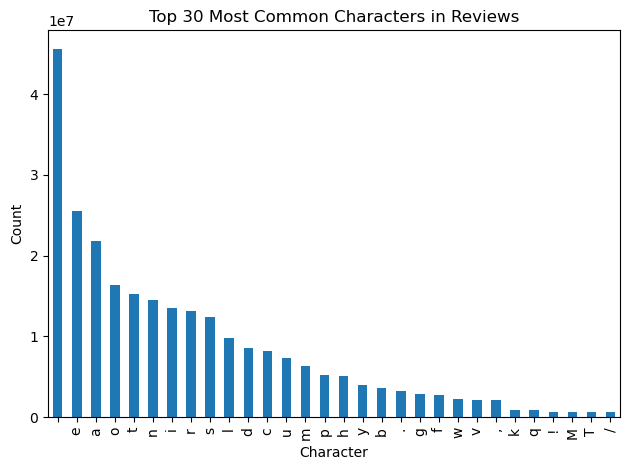

In [39]:
# character distribution
all_text = " ".join(reviews_df["comments"].astype(str).tolist())
char_counts = Counter(all_text)

char_dist_df = (
    pd.DataFrame.from_dict(char_counts, orient="index", columns=["count"])
    .sort_values("count", ascending=False)
)

# plot top 30 characters
plt.figure(figsize=(12,5))
char_dist_df.head(30).plot(kind="bar", legend=False)
plt.title("Top 30 Most Common Characters in Reviews")
plt.xlabel("Character")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

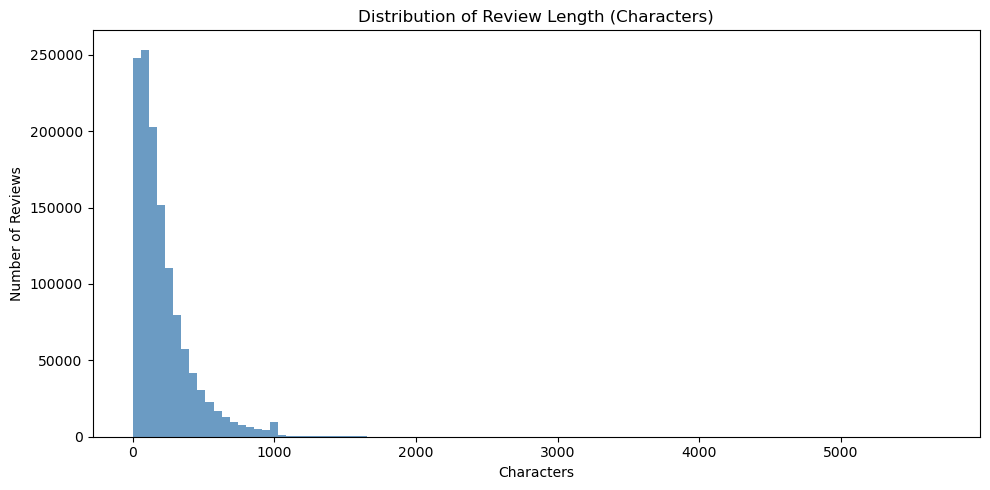

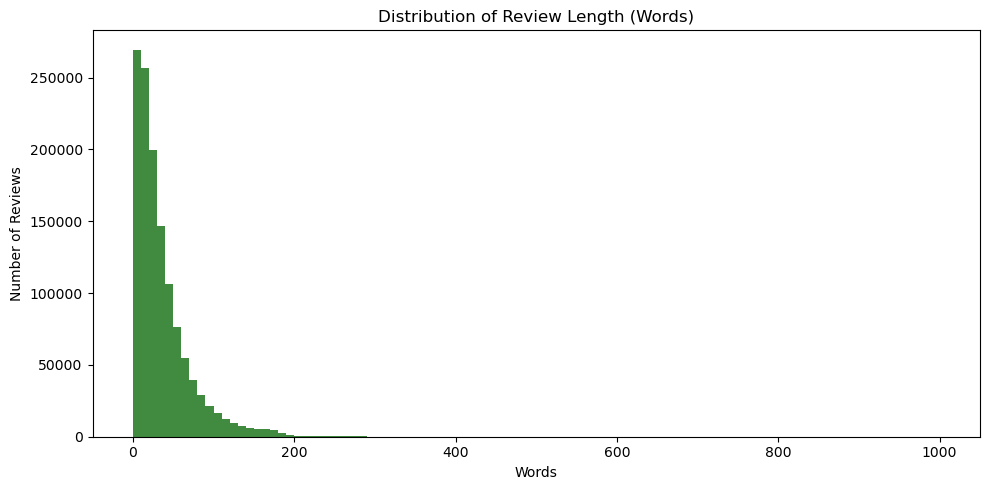

In [40]:
# review length

reviews_df["review_length_chars"] = reviews_df["comments"].str.len()
reviews_df["review_word_count"] = reviews_df["comments"].str.split().str.len()

plt.figure(figsize=(10,5))
plt.hist(reviews_df["review_length_chars"], bins=100, color="steelblue", alpha=0.8)
plt.title("Distribution of Review Length (Characters)")
plt.xlabel("Characters")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(reviews_df["review_word_count"], bins=100, color="darkgreen", alpha=0.75)
plt.title("Distribution of Review Length (Words)")
plt.xlabel("Words")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

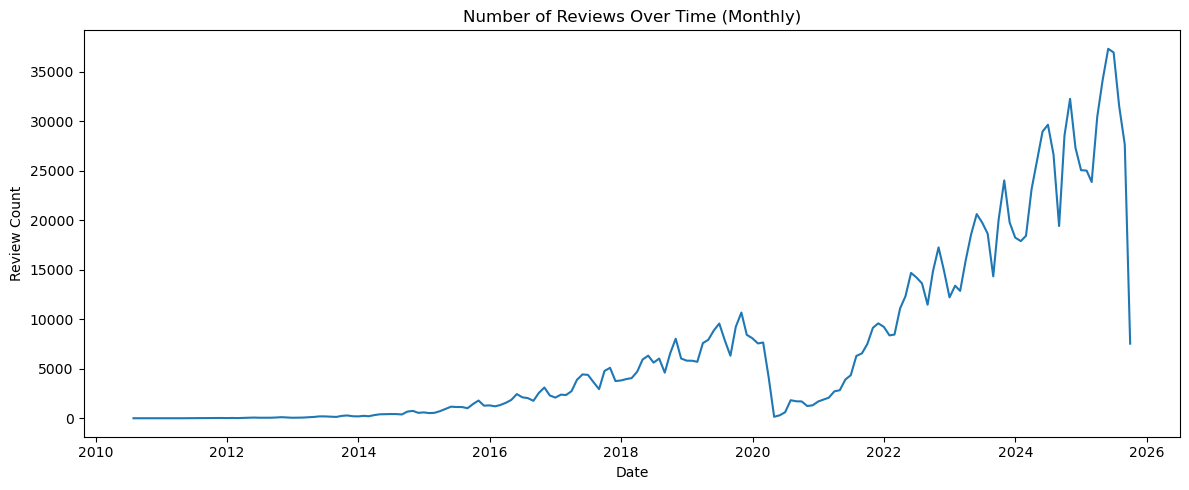

In [41]:
# reviews over time

reviews_over_time = (
    reviews_df
    .set_index("date")
    .resample("ME")["id"]
    .count()
)

plt.figure(figsize=(12,5))
plt.plot(reviews_over_time.index, reviews_over_time.values)
plt.title("Number of Reviews Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Review Count")
plt.tight_layout()
plt.show()

### 6.2 Text Preprocessing

In [42]:
# TODO: Preprocess review text for sentiment analysis
# Follow the preprocessing guidelines from the instructions above
#
# Recommended steps:
# 1. Filter out reviews with missing comments
# 2. Remove very short reviews (e.g., < 3 words)
# 3. Remove URLs if present
# 4. Clean extra whitespace
# 5. Create a cleaned version while keeping original
#
# Remember: DO NOT remove stopwords, punctuation, or convert to lowercase!

# filter out reviews with no comment
rs_df = reviews_df[reviews_df["comments"].notna()].copy()

# remove reviews less than 3 words
word_counts = rs_df["review_word_count"]
rs_df = rs_df[word_counts >= 3].copy()

# clean comments according to rules above
rs_df["comments_clean"] = (
    rs_df["comments"]
        .str.replace(r"http\S+|www\.\S+", "", regex=True)  # remove URLs
        .str.replace(r"\s+", " ", regex=True)              # normalize whitespace
        .str.strip()                                       # trim
)

# quick check
rs_df[["comments", "comments_clean"]].head()

comments  \
0  Juan Pedro was a nice host. JP provided detail...   
1  Very clean and neat appartment. I would recomm...   
2  Juanpe is open, honest and absolutely reliable...   
3  The place is nice and in a great location. We ...   
4  Juanpe is amazing person, he left all info reg...   

                                      comments_clean  
0  Juan Pedro was a nice host. JP provided detail...  
1  Very clean and neat appartment. I would recomm...  
2  Juanpe is open, honest and absolutely reliable...  
3  The place is nice and in a great location. We ...  
4  Juanpe is amazing person, he left all info reg...

In [43]:
# missing comments
missing_comments_before = reviews_df["comments"].isna().sum()

# reviews analyzed
total_reviews = len(rs_df)

# date range
date_min = rs_df["date"].min()
date_max = rs_df["date"].max()

# avg review lengths
avg_length_chars = rs_df["comments_clean"].str.len().mean()
avg_length_words = rs_df["comments_clean"].str.split().str.len().mean()

display(total_reviews, date_min, date_max, missing_comments_before, avg_length_words)

1201390

Timestamp('2010-07-06 00:00:00')

Timestamp('2025-09-14 00:00:00')

np.int64(0)

np.float64(37.64222692048377)

**✍️ Reviews Data Overview:**
- Total reviews analyzed: 1,199,164 / 1,275,992
- Date range: July 6th, 2010 -> September 14th, 2025
- Missing comments: None
- Average review length: 37.7 words
- Sampling strategy (if used): None, full list


### 6.3 Apply Sentiment Analysis

To get the sentiment of an specific review, we can use the following code:

```python
from textblob import TextBlob   # remember to install textblob first

def get_sentiment(text) -> float:
    """
    This function takes a string of text as input and returns the polarity (sentiment) of the text.
    The polarity is a float within the range [-1.0, 1.0] where -1.0 is very negative and 1.0 is very positive.
    More info can be found here: https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis
    """

    sentiment = TextBlob(text).sentiment
    return sentiment.polarity
```


In [44]:
# TODO: Apply TextBlob sentiment analysis
# Install TextBlob if needed: !pip install textblob
#
# Steps:
# 1. Import TextBlob
# 2. Create function to get sentiment scores
# 3. Apply to each review to get polarity and subjectivity

# decided to make this a file-saving flow because the sentiment analysis takes forever, so it is better to just do it once and store it

FILE_PATH = "rs_df.csv.gz"

# helper function
def get_sentiment(text) -> float:
        return TextBlob(text).sentiment.polarity

# if file exists read it, else do the long analysis and then save it
if os.path.exists(FILE_PATH):
    print(f"{time.time()}: Loading existing sentiment-annotated reviews from disk...")
    rs_df = pd.read_csv(FILE_PATH)

    # Restore datetime type (CSV can't store it properly)
    rs_df["date"] = pd.to_datetime(rs_df["date"], errors="coerce")

else:
    print(f"{time.time()}: No existing file found. Creating rs_df with sentiment...")
    rs_df["sentiment"] = rs_df["comments_clean"].apply(get_sentiment)
    print(f"{time.time()}: Saving rs_df to disk...")
    rs_df.to_csv(FILE_PATH, index=False, compression='gzip')

print("rs_df is ready!")

1766008090.074778: Loading existing sentiment-annotated reviews from disk...
rs_df is ready!


In [45]:
# same as above here, this is an extremely cpu intensive process that takes a long time, so it's better to do it once and leave it saved
# yes, we probably should have done these two the other way around to filter out the english reviews first and THEN analyze the sentiment
# but this is the order in which we bumped into each of the problems respectively

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # make detection deterministic

# helper function to detect language with this library
def detect_lang(text: str) -> str:
    try:
        return detect(text)
    except:
        return "unknown"

# only do this taxing process if we don't already have it in the df saved to disk
if not 'lang' in rs_df.columns.to_list():
    print(f"{time.time()}: lang not in columns. Analyzing language...")
    rs_df['lang'] = rs_df['comments_clean'].apply(detect_lang)
    print(f"{time.time()}: Done, saving...")
    rs_df.to_csv(FILE_PATH, index=False, compression='gzip')
    print(f"{time.time()}: Finished")

In [46]:
# TODO: Classify sentiments into categories
# Create categories: Positive, Neutral, Negative
# Define thresholds for classification

# set cutoffs
POSITIVE_CUTOFF = 0.2
NEGATIVE_CUTOFF = 0

# helper function
def sentiment_range(sentiment: float) -> str:
    if sentiment > POSITIVE_CUTOFF: return 'positive'
    if NEGATIVE_CUTOFF <= sentiment <= POSITIVE_CUTOFF: return 'neutral'
    if sentiment < NEGATIVE_CUTOFF: return 'negative'

# apply
rs_df_en = rs_df[rs_df['lang'] == 'en']
rs_df_en['sentiment_range'] = rs_df_en['sentiment'].apply(sentiment_range)
rs_df_en['sentiment_range'].value_counts()

/var/folders/jr/f_1nmytd20v46jvkl2_4c0p80000gn/T/ipykernel_7338/1726555279.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs_df_en['sentiment_range'] = rs_df_en['sentiment'].apply(sentiment_range)


sentiment_range
positive    426063
neutral      54142
negative      7030
Name: count, dtype: int64

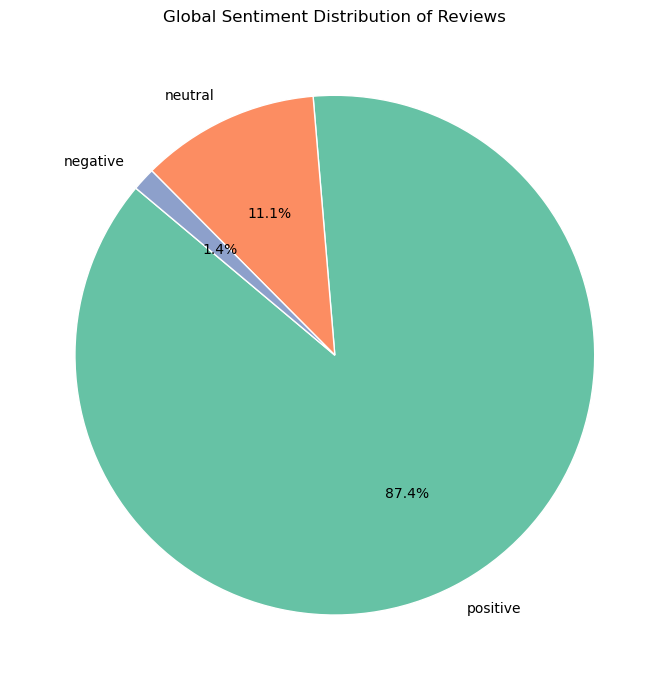

In [47]:
# TODO: Visualize global sentiment distribution
# Create: pie chart with proportions of positive, negative, and neutral reviews
# Only for english reviews, as that is where TextBlob is reliable

sent_counts = rs_df_en['sentiment_range'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    sent_counts.values,
    labels=sent_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5', '#fc8d62', '#8da0cb'],  # optional: consistent pleasant palette
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Global Sentiment Distribution of Reviews")
plt.tight_layout()
plt.show()

**✍️ Sentiment Analysis Method: TextBlob**
- Overall sentiment distribution:
  - Positive: 87.4%
  - Neutral: 11.1%
  - Negative: 1.4%


### 6.4 Sentiment Analysis by Different Dimensions

In [48]:
# TODO: Merge reviews with previous dataset (listings+neighbourhood) data to get property attributes
# You'll need listing information like: host_neighbourhood, property_type, price, host_is_superhost
# You will end up with a dataset that has reviews and property attributes

rs_df_en["listing_id"] = rs_df_en["listing_id"].astype(str)
listings_df["id"] = listings_df["id"].astype(str)

reviews_merged_df = rs_df_en.merge(
    listings_df,
    left_on="listing_id",
    right_on="id",
    how="left",   # keep all reviews, even if some listing metadata is missing
    validate="m:1"  # many reviews to one listing
)

display(reviews_merged_df.head())

/var/folders/jr/f_1nmytd20v46jvkl2_4c0p80000gn/T/ipykernel_7338/903521076.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs_df_en["listing_id"] = rs_df_en["listing_id"].astype(str)


listing_id     id_x       date  reviewer_id reviewer_name  \
0     354838  1100092 2012-04-08       926074      Masahiko   
1     354838  2062149 2012-08-22      1915019     Jean-Marc   
2     354838  2333538 2012-09-18      2880602     Ekaterina   
3     354838  2412223 2012-09-25       751843         Ahmet   
4     354838  2466170 2012-10-01      3214589           Ani   

                                            comments  review_length_chars  \
0  Juan Pedro was a nice host. JP provided detail...                  283   
1  Very clean and neat appartment. I would recomm...                  385   
2  Juanpe is open, honest and absolutely reliable...                  470   
3  The place is nice and in a great location. We ...                  144   
4  Juanpe is amazing person, he left all info reg...                  377   

   review_word_count                                     comments_clean  \
0                 52  Juan Pedro was a nice host. JP provided detail...   
1                 60  Very clean and neat appartment. I would recomm...   
2                 86  Juanpe is open, honest and absolutely reliable...   
3                 27  The place is nice and in a great location. We ...   
4                 64  Juanpe is amazing person, he left all info reg...   

   sentiment  ... instant_bookable calculated_host_listings_count  \
0   0.395833  ...              NaN                            NaN   
1   0.367667  ...              NaN                            NaN   
2   0.327758  ...              NaN                            NaN   
3   0.468750  ...              NaN                            NaN   
4   0.179594  ...              NaN                            NaN   

  calculated_host_listings_count_entire_homes  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

  calculated_host_listings_count_private_rooms  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

  calculated_host_listings_count_shared_rooms reviews_per_month price_temp  \
0                                         NaN               NaN        NaN   
1                                         NaN               NaN        NaN   
2                                         NaN               NaN        NaN   
3                                         NaN               NaN        NaN   
4                                         NaN               NaN        NaN   

  price_range price_log est_revenue_log  
0         NaN       NaN             NaN  
1         NaN       NaN             NaN  
2         NaN       NaN             NaN  
3         NaN       NaN             NaN  
4         NaN       NaN             NaN  

[5 rows x 94 columns]

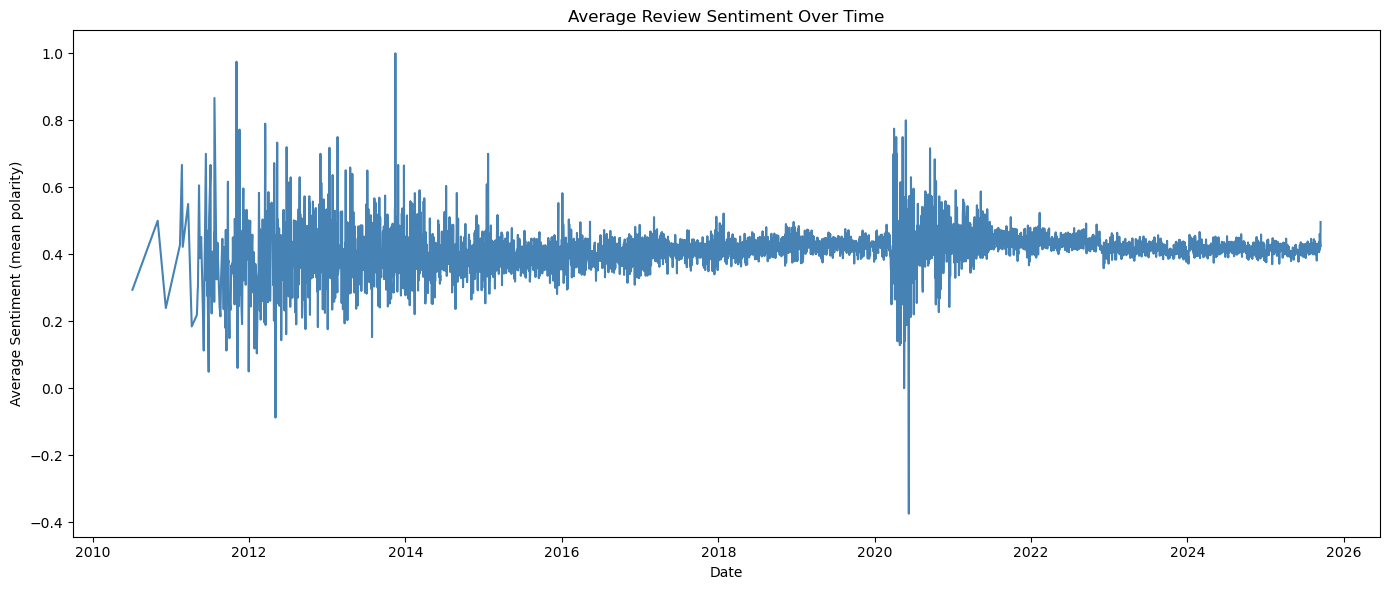

In [49]:
# TODO: Analyze general sentiment in the city over time
# For every day, calculate proportion of positive/negative reviews and show the time series
# Has sentiment changed over time?

daily_sentiment = (
    reviews_merged_df
    .groupby(reviews_merged_df["date"].dt.date)["sentiment"]
    .mean()
)

plt.figure(figsize=(14,6))

plt.plot(daily_sentiment.index, daily_sentiment.values, color='steelblue')

plt.title("Average Review Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Average Sentiment (mean polarity)")
plt.tight_layout()
plt.show()

**✍️ Temporal Insights:**
_How has sentiment evolved over time?_

Generally quite stable. Was a lot more volatile in the early years of the platform. It's very interesting to see the impact of covid: massively increases the volatility of sentiment, slightly increases the mean, and then we see the mean sharply fall back down once countries started opening up again. It's hard to understand why, but a very interesting pattern.


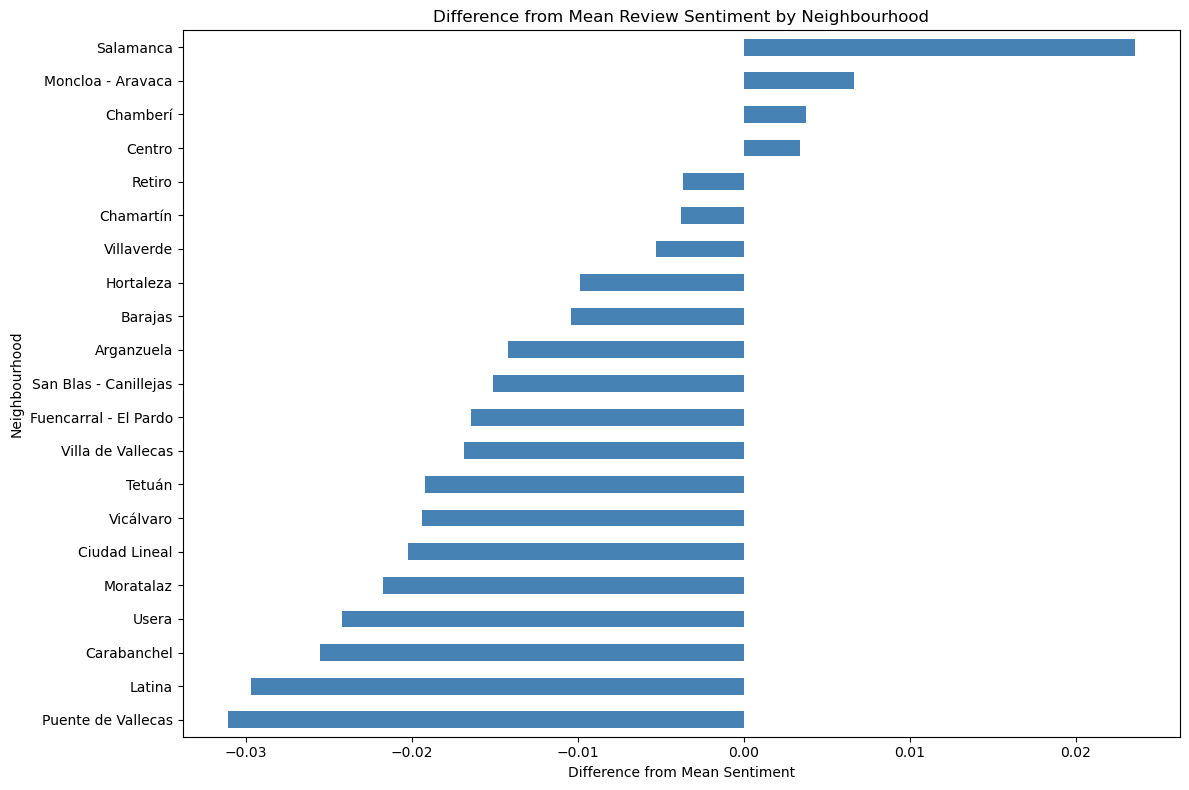

In [50]:
# TODO: Compare sentiment across neighbourhoods
# Which neighbourhoods have the most positive/negative reviews?

# We're doing most of these as difference from the mean because that communicates a lot more about the trend against the city

neigh_sent = (
    reviews_merged_df
    .groupby("neighbourhood_group_cleansed")["sentiment"]
    .mean()
    .sort_values()
)

global_mean = reviews_merged_df["sentiment"].mean()

neigh_sent_diff = (neigh_sent - global_mean).sort_values()


plt.figure(figsize=(12, 8))
neigh_sent_diff.plot(kind='barh', color='steelblue')

plt.title("Difference from Mean Review Sentiment by Neighbourhood")
plt.xlabel("Difference from Mean Sentiment")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()

**✍️ Neighbourhood Sentiment:**
_What patterns do you see across different areas?_

It's not entirely surprising to see that luxury and central districts with history generally rate a little higher than those in lower income neighbourhoods with less to see, however the difference is quite small, barely a change of 0.05 over all districts.

property_type
Entire hostel    0.363028
Tiny home        0.370152
Private room     0.379709
Room in hotel    0.401463
Floor            0.402399
Name: sentiment, dtype: float64

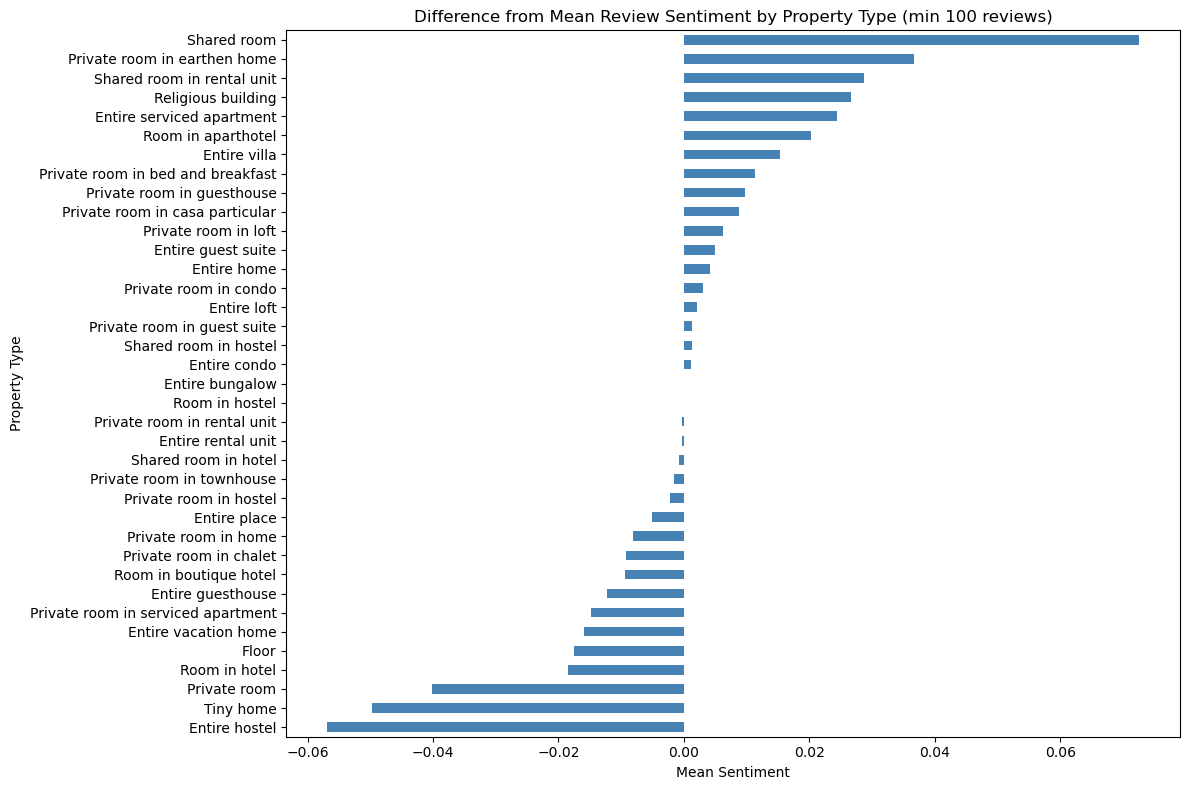

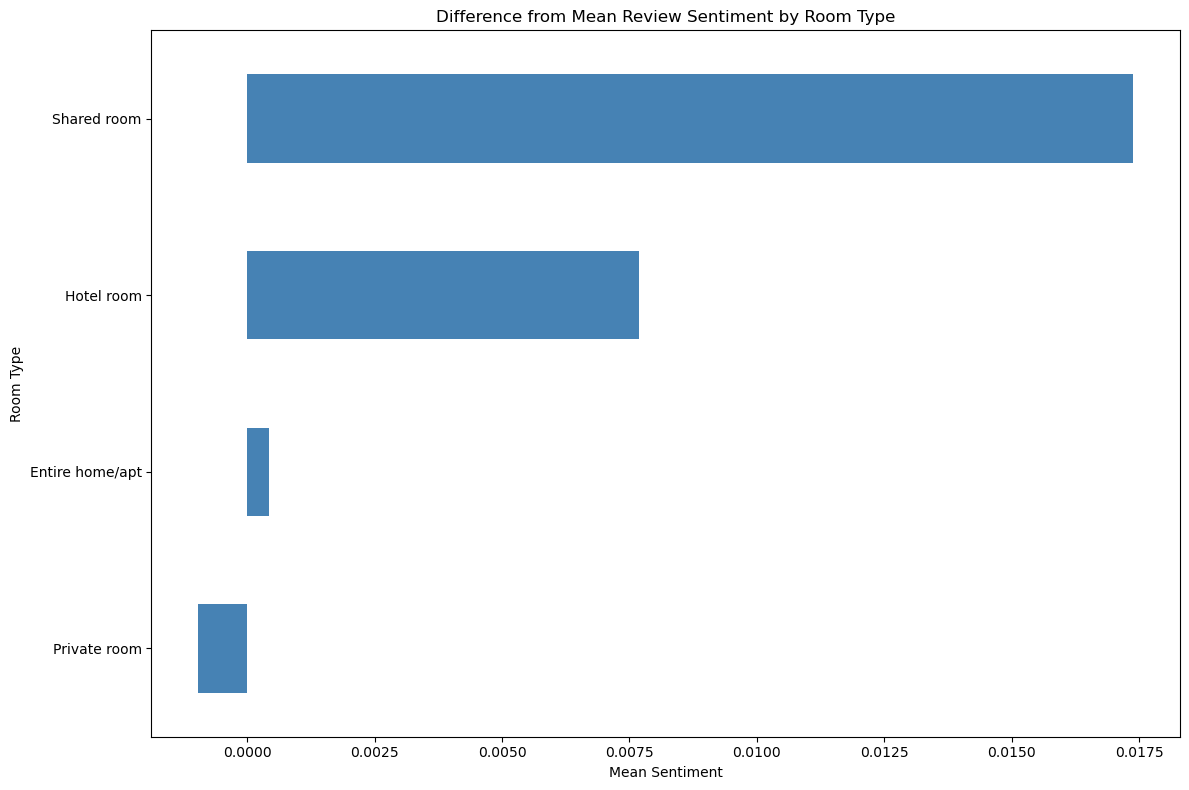

In [51]:
# TODO: Compare sentiment by property & room type
# We're doing most of these as difference from the mean because that communicates a lot more about the trend against the city

prop_counts = reviews_merged_df.groupby("property_type", observed=True)["sentiment"].count()
valid_props = prop_counts[prop_counts > 100].index
property_sent = (
    reviews_merged_df[reviews_merged_df["property_type"].isin(valid_props)]
    .groupby("property_type", observed=True)["sentiment"]
    .mean()
    .sort_values()
)

display(property_sent.head())
property_sent = property_sent[property_sent > 0.1].sort_values()
property_sent_diff = (property_sent - global_mean).sort_values()

plt.figure(figsize=(12, 8))
property_sent_diff.plot(kind='barh', color='steelblue')

plt.title("Difference from Mean Review Sentiment by Property Type (min 100 reviews)")
plt.xlabel("Mean Sentiment")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()


room_sent = (
    reviews_merged_df
    .groupby("room_type", observed=True)["sentiment"]
    .mean()
    .sort_values()
)

room_sent_diff = (room_sent - global_mean).sort_values()

plt.figure(figsize=(12, 8))
room_sent_diff.plot(kind='barh', color='steelblue')

plt.title("Difference from Mean Review Sentiment by Room Type")
plt.xlabel("Mean Sentiment")
plt.ylabel("Room Type")
plt.tight_layout()
plt.show()


**✍️ Type-Sentiment Relationship:**
_Do different types of listings have better sentiment?_

Surprisingly shared rooms are the highest rated both as a property and room type, with private rooms following, and entire homes after. Perhaps having met the hosts, people are more inclined to be positive about their stay, or perhaps this is also a sort of self-selection bias. Those who are more willing to share a room may have lower expectations and needs, and therefore generally rate higher.

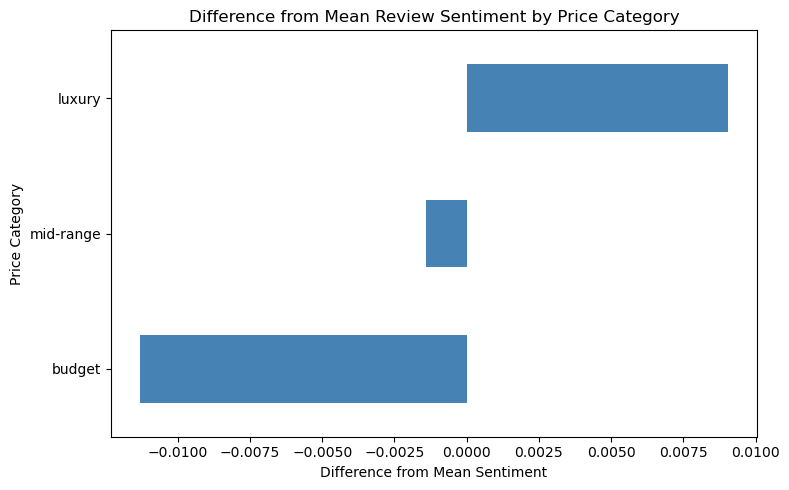

In [52]:
# TODO: Compare sentiment by price range
# Create price categories (budget, mid-range, luxury) and compare
# We're doing most of these as difference from the mean because that communicates a lot more about the trend against the city

def price_category(price):
    if price <= q1:
        return "budget"
    elif price <= q2:
        return "mid-range"
    else:
        return "luxury"

q1 = reviews_merged_df["price"].quantile(0.33)
q2 = reviews_merged_df["price"].quantile(0.66)
reviews_merged_df["price_category"] = reviews_merged_df["price"].apply(price_category)

price_sent = (
    reviews_merged_df
    .groupby("price_category")["sentiment"]
    .mean()
    .sort_values()
)

price_sent_diff = (price_sent - global_mean).sort_values()

plt.figure(figsize=(8,5))
price_sent_diff.plot(kind="barh", color="steelblue")

plt.title("Difference from Mean Review Sentiment by Price Category")
plt.xlabel("Difference from Mean Sentiment")
plt.ylabel("Price Category")
plt.tight_layout()
plt.show()

**✍️ Price-Sentiment Relationship:**
_Do more expensive listings have better sentiment?_

Yes, but barely. A difference of 0.01 from the mean for the price categories, at most. It doesn't really make a difference either way.

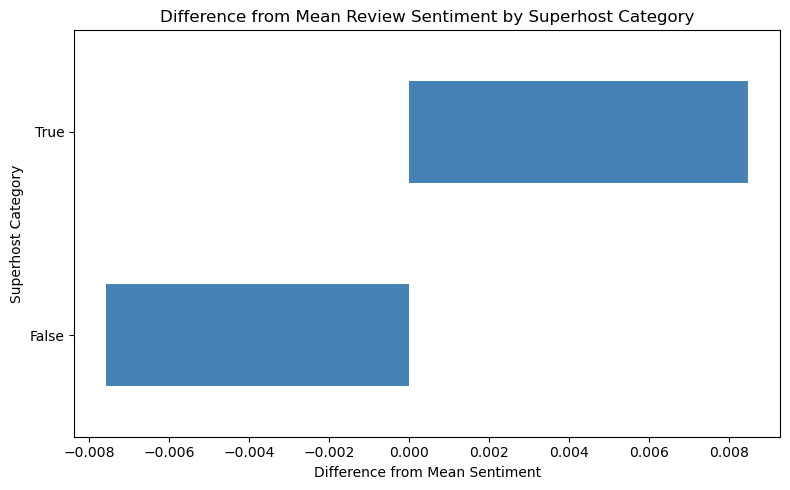

In [53]:
# TODO: Compare Superhost vs Non-Superhost sentiment
# We're doing most of these as difference from the mean because that communicates a lot more about the trend against the city

superhost_sent = (
    reviews_merged_df
    .groupby("host_is_superhost")["sentiment"]
    .mean()
    .sort_values()
)

superhost_sent_diff = (superhost_sent - global_mean).sort_values()

plt.figure(figsize=(8,5))
superhost_sent_diff.plot(kind="barh", color="steelblue")

plt.title("Difference from Mean Review Sentiment by Superhost Category")
plt.xlabel("Difference from Mean Sentiment")
plt.ylabel("Superhost Category")
plt.tight_layout()
plt.show()


**✍️ Superhost Sentiment:**
_Is there a sentiment difference between superhosts and regular hosts?_

Yes, superhosts have a slightly better sentiment! But once again this is a tiny difference, less than 0.008 either side. However, it is a consistent trend.

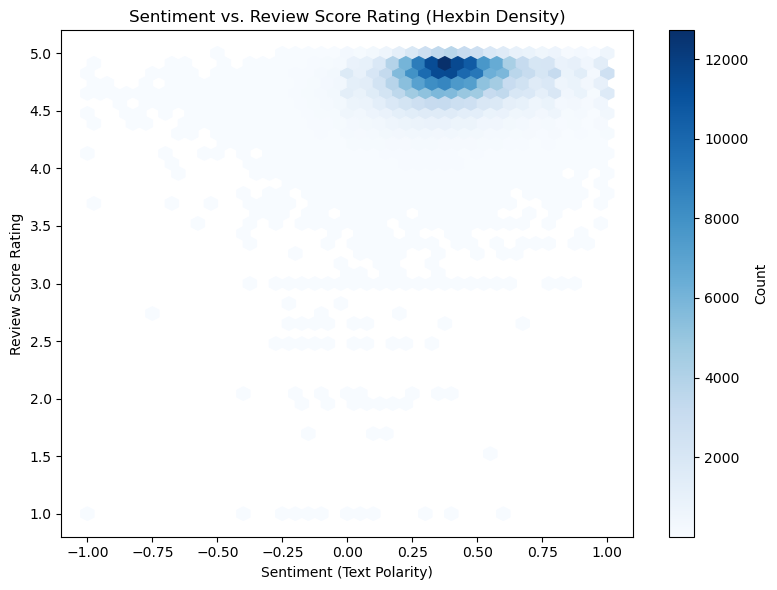

In [54]:
# TODO: Correlate sentiment with review scores from listings
# Do text sentiments align with numerical ratings?

plt.figure(figsize=(8,6))
plt.hexbin(
    reviews_merged_df["sentiment"],
    reviews_merged_df["review_scores_rating"],
    gridsize=40,
    cmap="Blues",
    mincnt=1
)

plt.title("Sentiment vs. Review Score Rating (Hexbin Density)")
plt.xlabel("Sentiment (Text Polarity)")
plt.ylabel("Review Score Rating")

cb = plt.colorbar()
cb.set_label("Count")
plt.tight_layout()
plt.show()

**✍️ Sentiment vs Ratings:**
_How well does text sentiment match numerical review scores?_

It barely has anything to do. We'd see some kind of diagonal trend across this if there were some relationship between sentiment and ratings, but it seems there's no real relationship here. The distribution of sentiment is relatively even at each review score rating level.

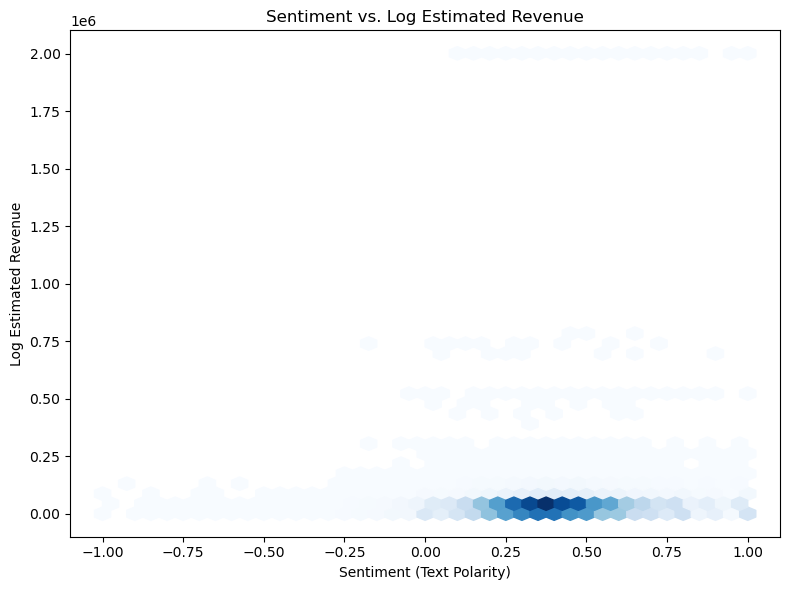

In [55]:
# TODO: Correlate sentiment with estimated revenue of listings
# Do text sentiments align with how much a property earns? I.e. are reviews worth listening to?

plt.figure(figsize=(8,6))
plt.hexbin(
    reviews_merged_df["sentiment"],
    reviews_merged_df["estimated_revenue_l365d"],
    gridsize=40,
    cmap="Blues",
    mincnt=1
)

plt.title("Sentiment vs. Log Estimated Revenue")
plt.xlabel("Sentiment (Text Polarity)")
plt.ylabel("Log Estimated Revenue")
plt.tight_layout()
plt.show()

**✍️ Sentiment vs Estimated Revenue:**
_How well does text sentiment match estimated revenue?_

I added this one in because I thought it'd be interesting to see if hosts that receive more positive reviews make more money, but that does not seem to be the case. It's spread wide across, which suggests there is not a great correlation between the two variables.

### 6.5 Words Cloud

In [56]:
# TODO: Extract most common words in positive reviews

def extract_common_words(series) -> pd.DataFrame:
    remove_list = [
        "the", "and", "to", "a", "in", "of", "for", "is", "it", "i", "we", "was", 
        "my", "our", "you", "with", "at", "were", "as", "this", "are", "from", 
        "so", "us", "that", "on", "but", "all", "would", "madrid.", "madrid",
        "very", "great", "i", "place", "stay", "had", "great", "really", "an",
        "well", "be", "have", "there", "not", "not", "very", "had", "no", "there", 
        "have", "be", "they", "only", "an", "which", "one", "or", "when", "me", 
        "out", "if", "like", "did", "because", "great", "very"
    ]
    
    all_words = " ".join(series.astype(str)).split()
    filtered_words = [w for w in all_words if w.lower() not in remove_list]
    word_counts = Counter(filtered_words)
    
    # Convert to DataFrame
    pos_words_df = (
        pd.DataFrame(word_counts.items(), columns=["word", "count"])
        .sort_values("count", ascending=False)
    )
    
    return pos_words_df

positive_reviews = reviews_merged_df[
    reviews_merged_df["sentiment_range"] == "positive"
]["comments_clean"]

common_words_positive = extract_common_words(positive_reviews)
common_words_positive.head(30)

word   count
126    apartment  171526
98      location  115645
35         clean   70943
2           nice   68524
111   everything   65410
38     recommend   64806
42          good   59396
237        close   57306
71          host   50581
294      perfect   50423
127         easy   44806
558   definitely   41644
422         walk   39013
107  comfortable   38081
182         also   36833
110          has   35256
189         just   34874
801      walking   34628
986        super   34519
116    location.   33984
755    location,   33674
197        metro   33592
255        stay.   32726
93          time   31966
120      helpful   31318
370  restaurants   31198
441         room   30525
148            -   28877
526         here   28877
244      located   28814

In [57]:
# TODO: Extract most common words in negative reviews

negative_reviews = reviews_merged_df[
    reviews_merged_df["sentiment_range"] == "negative"
]["comments_clean"]

common_words_negative = extract_common_words(negative_reviews)
common_words_negative.head(30)

word  count
245  apartment   3116
36        host   1812
473       room   1344
6        small   1259
182   location   1050
657        get   1040
171   bathroom    989
671       also    924
823         he    917
65       after    913
386         up    910
11        even    899
106        bed    890
54        door    878
215         by    877
376        has    873
24        just    868
68       about    865
38       could    857
713      check    853
128      night    853
567        can    837
344        bad    831
618      other    826
381      water    765
279     shower    753
358       time    745
95        some    696
50         she    691
62           2    684

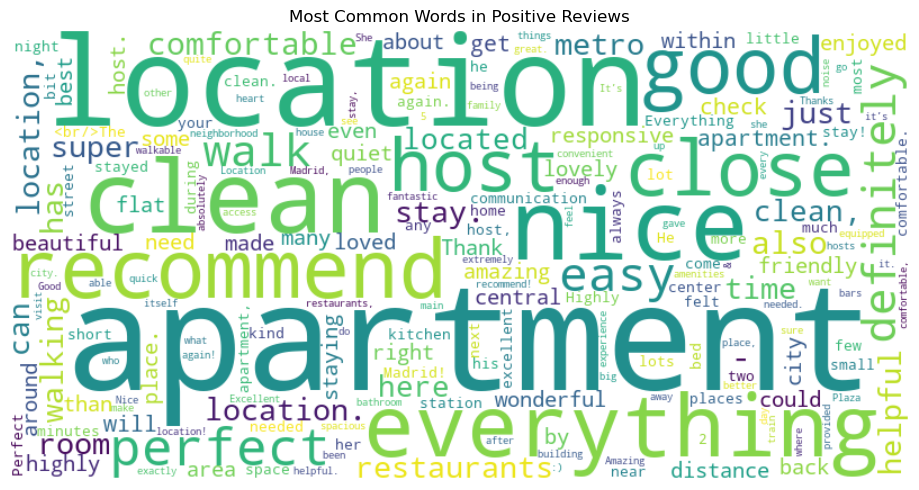

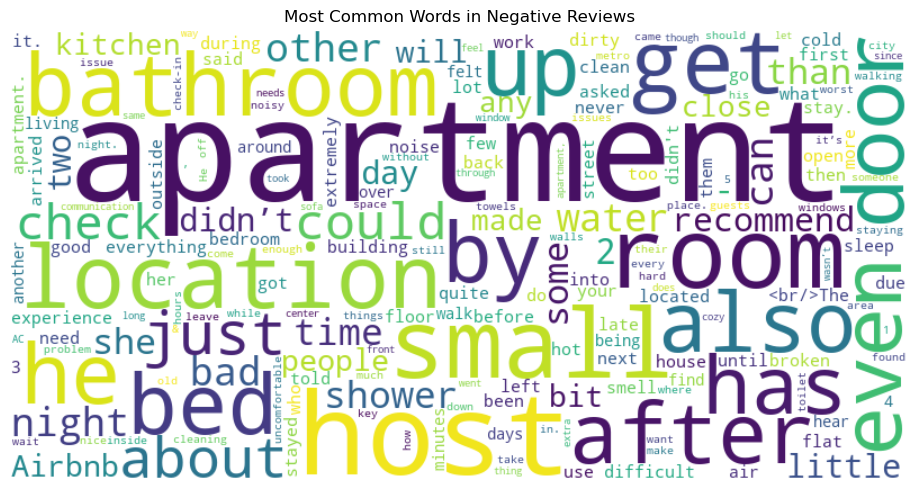

In [58]:
# TODO: Create words cloud (optional but visually appealing)
# One for common_words_positive, one for common_words_negative

def plot_wordcloud(words_df, title, max_words=200):
    # Convert df ("word", "count") -> {word: count}
    freqs = dict(zip(words_df["word"], words_df["count"]))

    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        max_words=max_words
    ).generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Positive word cloud
plot_wordcloud(
    common_words_positive.head(300),
    title="Most Common Words in Positive Reviews"
)

# Negative word cloud
plot_wordcloud(
    common_words_negative.head(300),
    title="Most Common Words in Negative Reviews"
)


=== Listing Overview ===
Listing ID:      30320
Name:            Apartamentos Dana Sol
URL:             https://www.airbnb.com/rooms/30320
Neighbourhood:   Sol (Centro)
Property type:   Entire rental unit
Room type:       Entire home/apt
Price:           157.0  |  Price range: (110.0, 164.0]
Host:            Danuta Weronika
Superhost:       False

=== Review Summary ===
Total reviews:          133
Date range:             2010-07-06 → 2021-10-09
Average sentiment:      0.374
Median sentiment:       0.350
Average length (chars): 361.2
Average length (words): 64.5
Sentiment counts:
  positive: 110
  neutral : 22
  negative: 1

=== Ratings Summary (difference vs city average) ===
review_scores_rating        :  4.63  (Δ vs city: -0.13)
review_scores_accuracy      :  4.71  (Δ vs city: -0.09)
review_scores_cleanliness   :  4.88  (Δ vs city: +0.09)
review_scores_checkin       :  4.82  (Δ vs city: -0.01)
review_scores_communication :  4.78  (Δ vs city: -0.08)
review_scores_location      :  4.90

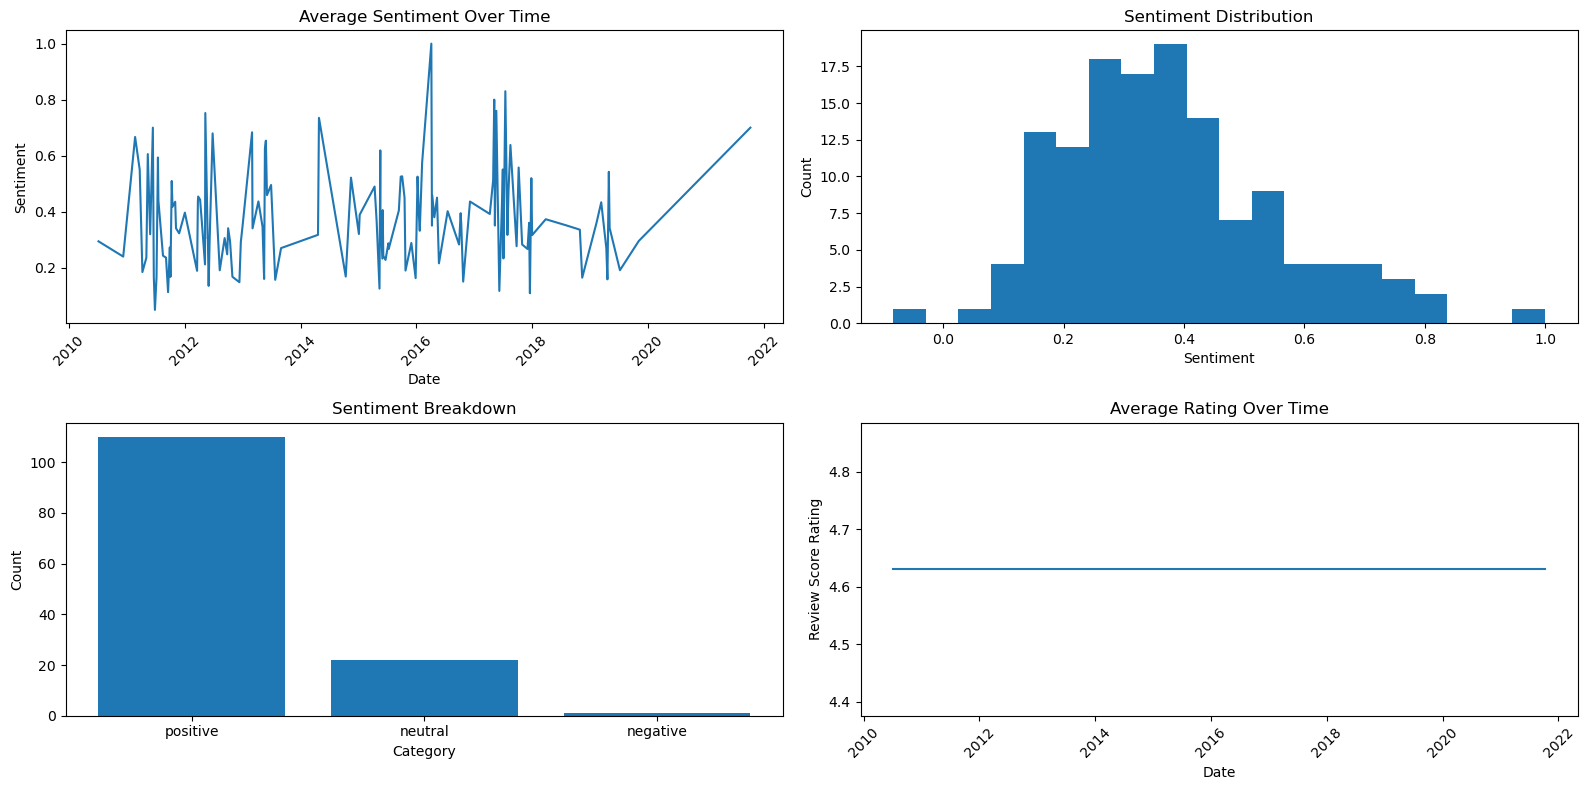

In [59]:
# TODO: Create a function that, given a listing, returns a dashboard of the listing

def listing_dashboard(listing_id, df=reviews_merged_df):
    listing_id = str(listing_id)
    listing_reviews = df[df["listing_id"] == listing_id].copy()
    listing_reviews["date_day"] = pd.to_datetime(listing_reviews["date"]).dt.date
    
    if listing_reviews.empty:
        print(f"No reviews found for listing_id={listing_id}")
        return
    
    # basic listing metadata
    row = listing_reviews.iloc[0]
    
    print("=== Listing Overview ===")
    print(f"Listing ID:      {listing_id}")
    print(f"Name:            {row.get('name', '')}")
    print(f"URL:             {row.get('listing_url', '')}")
    print(f"Neighbourhood:   {row.get('neighbourhood_cleansed', '')} "
          f"({row.get('neighbourhood_group_cleansed', '')})")
    print(f"Property type:   {row.get('property_type', '')}")
    print(f"Room type:       {row.get('room_type', '')}")
    print(f"Price:           {row.get('price', '')}  |  Price range: {row.get('price_range', row.get('price_category', ''))}")
    print(f"Host:            {row.get('host_name', '')}")
    print(f"Superhost:       {row.get('host_is_superhost', '')}")
    print()
    
    # reviews summary
    n_reviews = len(listing_reviews)
    first_review = listing_reviews["date_day"].min()
    last_review = listing_reviews["date_day"].max()
    
    avg_sentiment = listing_reviews["sentiment"].mean()
    median_sentiment = listing_reviews["sentiment"].median()
    
    avg_length_chars = listing_reviews["review_length_chars"].mean()
    avg_length_words = listing_reviews["review_word_count"].mean()
    
    sentiment_counts = listing_reviews["sentiment_range"].value_counts().reindex(
        ["positive", "neutral", "negative"], fill_value=0
    )
    
    print("=== Review Summary ===")
    print(f"Total reviews:          {n_reviews}")
    print(f"Date range:             {first_review} → {last_review}")
    print(f"Average sentiment:      {avg_sentiment:.3f}")
    print(f"Median sentiment:       {median_sentiment:.3f}")
    print(f"Average length (chars): {avg_length_chars:.1f}")
    print(f"Average length (words): {avg_length_words:.1f}")
    print("Sentiment counts:")
    for label, count in sentiment_counts.items():
        print(f"  {label:8}: {count}")
    print()
    
    # ratings summary
    rating_cols = [
        "review_scores_rating",
        "review_scores_accuracy",
        "review_scores_cleanliness",
        "review_scores_checkin",
        "review_scores_communication",
        "review_scores_location",
        "review_scores_value",
    ]
    existing_rating_cols = [c for c in rating_cols if c in listing_reviews.columns]
    
    if existing_rating_cols:
        ratings_mean = listing_reviews[existing_rating_cols].mean()
        city_ratings_mean = df[existing_rating_cols].mean()
        
        print("=== Ratings Summary (difference vs city average) ===")
        for col in existing_rating_cols:
            this_val = ratings_mean[col]
            city_val = city_ratings_mean[col]
            diff = this_val - city_val
            print(f"{col:28}: {this_val:5.2f}  (Δ vs city: {diff:+.2f})")
        print()
    
    # sentiment for this listing
    ts_sent = (
        listing_reviews
        .groupby("date_day")["sentiment"]
        .mean()
        .sort_index()
    )
    
    # rating
    if "review_scores_rating" in listing_reviews.columns:
        ts_rating = (
            listing_reviews
            .groupby("date_day")["review_scores_rating"]
            .mean()
            .sort_index()
        )
    else:
        ts_rating = None

    # plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 8))
    axes = axes.ravel()
    
    axes[0].plot(ts_sent.index, ts_sent.values)
    axes[0].set_title("Average Sentiment Over Time")
    axes[0].set_xlabel("Date")
    axes[0].set_ylabel("Sentiment")
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].hist(listing_reviews["sentiment"], bins=20)
    axes[1].set_title("Sentiment Distribution")
    axes[1].set_xlabel("Sentiment")
    axes[1].set_ylabel("Count")
    
    axes[2].bar(sentiment_counts.index, sentiment_counts.values)
    axes[2].set_title("Sentiment Breakdown")
    axes[2].set_xlabel("Category")
    axes[2].set_ylabel("Count")
    
    if ts_rating is not None and not ts_rating.empty:
        axes[3].plot(ts_rating.index, ts_rating.values)
        axes[3].set_title("Average Rating Over Time")
        axes[3].set_xlabel("Date")
        axes[3].set_ylabel("Review Score Rating")
        axes[3].tick_params(axis='x', rotation=45)
    else:
        axes[3].axis("off")
        axes[3].set_title("No rating data available")
    
    plt.tight_layout()
    plt.show()

listing_dashboard(30320)

### ✍️ Summary of Sentiment Analysis:


**Overall Findings:**

Generally reflects the fundamentals being a necessity (location & cleanliness), signals that small rooms get lower ratings, and it's interesting to see how little most variables affect reviews and sentiment.

**Positive Review Themes:**

Positive reviews speak of cleanliness and location mostly, which is a theme we've seen reflected once and again throughout this analysis. The fundamentals of a place to stay.

**Negative Review Themes:**

Size seems to be a concern, as well as once again location. The host also seems to often be a topic that comes up in negative discussion.

**Surprising Insights:**

It was very surprising to see that sentiment did not relate too much to the ratings or the earnings of a listing. And it was also interesting to see that the other variables have expected relationships, but the effect size is tiny, from like 0.008 to 0.1.

---

## 🎯 Part 7: Final Insights and Recommendations

### Instructions:
Synthesize your findings and provide actionable insights.

💡 **Important:** If you need additional analysis beyond what you did in Parts 1-6 to answer the business questions below, feel free to add more analysis cells here. The previous parts provide a foundation, but you may need to create specific visualizations or calculations to fully address these questions.

### 7.1 Answer Business Questions
Based on your analysis, answer:

1. **For Hosts:**
   - What property type should they offer? _They should most definitely offer an entire home, they are most related with high earnings over a year_
   - How should they price their listing? _High, the data shows that more expensive listings make more money than better reviewed listings, so likely they should overprice a little_
   - Which neighbourhood should they target? _Centro is the best_
   - What factors lead to better reviews? _Basically only location and cleanliness_

3. **For Guests:**
   - What factors indicate a good listing? _A good listing is generally in technical terms, location and cleanliness. In terms of sentiment however, it seems the important thing is sharing the room, or the house, at least. Surprising!_
   - Which neighbourhoods offer best value? _It seems Vicalvaro, Moratalaz, and Villaverde offer the best value for money in Madrid according to guest reviews_
   - How reliable are reviews vs ratings? _Reviews tend to just generally be nice, which makes them not be super related to ratings, at least not in a very mappable way_

4. **For Airbnb Platform:**
   - What are signs of quality listings? _Location and cleanliness above all, as well as hosts with good communication patterns_
   - Where is supply vs demand imbalanced? _Centro and the luxury districts like Salamanca and Retiro is where there is most demand and highest sentiment_
   - What can improve user satisfaction? _Location and cleanliness above all_

### 7.2 Key Insights Summary
List your top 10 insights from the entire analysis

- Location and cleanliness dominate reviews as well as drive pricing
- Pricing drives revenue more than ratings and occupancy do
- Entire homes outperform other property types
- Centro is the highest earning neighbourhood, but Salamanca the best perceived one
- Sentiment correlates very weakly with ratings
- Room size and host communication are common pain points
- Ratings are compressed around 5 and generally not very informative
- Listing supply and demand vary sharply across neighbourhoods
- Expensive neighbourhoods don't earn higher ratings, but do achieve a more positive sentiment, likely to do with expectations and enjoyment
- Mid priced neighbourhoods offer the best deal in terms of price and sentiment

### ✍️ Business Recommendations:

**For Hosts:**

1. Location is everything: this is nothing new, but the only variable really associated with an increased price and increased revenue over a year was location. Everything else was kind of irrelevant, except cleaning very slightly. Listings with great cleanliness scores had a correlation with higher places. So choose a good location, and keep it clean. Nothing new, just the fundamentals
2. Charge more: pretty much without exception, listings that charged more earned more revenue per year, EVEN when their reviews were worse. This once again speaks to the tip above, if the fundamentals are good, you'll have demand, and you'll be able to charge. Even if you're a terrible host who replies slowly, communicates poorly, or any of the other things you can be reviewed on, they were all not correlated to price.
3. Be honest about size and expectations: a recurring theme in negative sentiment was complaints about small rooms or the place feeling smaller than expected. Make sure photos and descriptions are realistic (or conservative) about size and layout. You won’t necessarily earn more, but you’ll avoid bad reviews that could hurt long-term performance.
4. Focus effort where it actually pays off: since most review sub-scores and host metrics were barely correlated with revenue, it makes more sense to invest in what moves the needle: (1) strong location, (2) real cleanliness, and (3) a price that reflects local demand. Over-optimizing tiny rating differences (like 4.85 vs 4.9) doesn’t seem to pay off nearly as much as getting those fundamentals right.

**For Guests:**

1. Don’t obsess over tiny rating differences: ratings are very compressed and didn’t show a strong link with sentiment or earnings. Instead of only booking the place with the highest numerical rating, prioritize listings with consistently good comments about cleanliness and location.
2. Look for value outside Centro: it's expensive and high-earning, but not necessarily better-rated. Neighbourhoods just outside the center that still have good transport and safety can offer very similar guest satisfaction at noticeably lower prices.
3. Read the reviews for red flags: because sentiment isn’t strongly tied to the overall rating, the review text is where guests really reveal problems: small rooms, misleading photos, noise, host behavior, etc. 

**For Airbnb Platform:**

1. Surface cleanliness and location more prominently in search: since those are the variables actually linked to sentiment and pricing, Airbnb could highlight cleanliness/location scores or badges more than tiny differences in the overall rating.
2. Use review text & sentiment to detect problem listings: automated sentiment analysis could flag listings with repeated complaints about size, cleanliness, or host communication, even when their average rating is still high.
3. Guide users toward value areas: the platform could recommend neighbourhoods that show a good balance of price and rating/sentiment (best value areas), instead of always pushing the most central or most expensive listings. This provides value to guests as they discover better options and get a better experience for cheaper.


### ✍️ Limitations:

**Data Limitations:**

- Selection bias - review scores and comments come from people who choose to review, however that skews the data, it does skew it
- Many inactive properties messing with the averages
- Price data a little unreliable as there is no breakdown on cleaning fees and etc.
- Dataset does not track updates to existing listings

**Analysis Limitations:**

- Sentiment analysis is quite unreliable as a measure of people's enjoyment, and often more indicative of writing style or personality.
- Analysis was of great quality for central neighbourhoods with tons of listings, but the others seem a little distorted by lack of data.
- Outliers disproportionately influence a lot of measures.
- The bubble charts and summary statistics rely heavily on aggregation, which can obscure property-level variation.

**Assumptions Made:**

- That a correlation may indicate some sort of causal relationship, we make this assumption all over our analysis.
- Neighbourhood boundaries were treated as accurate and meaningful for comparison, even though guests may perceive "location quality" differently within a neighbourhood.
- Sentiment analysis assumes review language is representative and interpretable by the model without context-specific biases.

**Additional Data Needed:**

- Time-series data (daily or monthly) for prices and availability to account for seasonality and dynamic pricing strategies.
- More granular location features (distance to metro, points of interest, walkability scores) to better quantify what “location quality” means.
- Additional sentiment dimensions (e.g., topic modeling, review length, emotion tagging) to capture more depth than simple polarity scoring.
- Data on cleaning fees and service fees to better analyze true total price paid by guests.



### ✍️ Future Work:

**Potential Additional Analyses:**

1. Time-series analysis of price and demand: investigate seasonal patterns, peak months, and how pricing changes throughout the year
2. Neighbourhood clustering: machine learning to group neighbourhoods by price, sentiment, and rating patterns to identify natural segments
3. Amenity impact analysis: quantify which amenities (wifi, AC, etc.) contribute most to price uplift or higher guest satisfaction.


**Predictive Models:**

1. Price prediction model: a model to predict price based on features like property type, location, amenities, size, and review scores. This could reveal hidden drivers of price.
2. Review sentiment prediction: a classifier to predict whether a review is positive or negative based on listing characteristics — useful for understanding what *causes* good or bad guest experiences.
3. Occupancy or revenue forecasting: predict which listings will generate the highest annual revenue, aiding hosts in strategic pricing or property acquisition.


**Feature Engineering Opportunities:**

1. Location quality metrics: features such as distance to city center, transit scores, walkability indices, or proximity to major attractions to better quantify the concept of good location
2. Amenity richness score: Combine multiple amenities into composite indices (e.g., “comfort score”, “tech score”, “family-friendly score”) to more effectively model their contribution to price or satisfactio
3. Host professionalism score: combine host metrics (response time, superhost status, review sentiment about host) into a single engineered variable to test its predictive power




---

## 📝 Reflection on LLM Usage

### Instructions:
Reflect on your experience using LLMs in this assignment.

### ✍️ LLM Usage Report:

**Which LLM(s) did you use?**

ChatGPT

**Most helpful use cases:**

1. Mapping neighbourhoods
2. Graphing without needing intricate knowledge of seaborn, matplotlib, plotly, etc.
3. Extending things like "remove_list" in extract_common_words, or code cells that are almost exactly alike except a couple words

**Challenges encountered:**

Trouble feeding ipynb into it in a readable format, particularly for outputs, Jupyter for some reason only copies one output out of the whole cell, so it was a very manual job to feed it interpretable data.

**What worked well:**

Being super super specific about contextual variables to keep in mind and specifying expected output, more than anything. All tips can kind of be summed up in those two things.

**What didn't work well:**

Using it for interpretation. Not only does it not have context on the whole model because it cannot read the whole analysis, it was often just very hard to translate findings to it in a way it could interpret.

**Key learnings about using LLMs for data analysis:**

Very useful for the repetitive tasks like visualization, but interpretation and analysis are better done by us, as we have more context about the situation often. Great for checking assumptions however.

**Examples of particularly effective prompts:**

Way too long to post here, but the general structure is:

1.  Prompt: Create a graph that has the compares log price with overall ratings, but make sure the axes are kept in non-log so that the graph remains interpretable.
2.  Context: Remember that we are using Seaborn for graphing, and the relevant column names are price_log, and review_scores_rating
3.  Input: code, or cell output

(repeat context and input as many times as necessary for complex queries)

**How LLMs enhanced your analysis:**

Not too meaningfully, the biggest contribution was providing some context about what values should be expected of this kind of dataset, for example, for things like sentiment. It's a hard variable to read if you don't have an intuition for TextBlob, so ChatGPT was good there, helping interpret what kind of levels of sentiment could be considered positive or negative in this situation.

---

## 🎓 Grading Rubric

| Section | Points | Criteria |
|---------|--------|----------|
| **Part 1: Setup** | 10 | Complete environment setup, data loading, basic exploration |
| **Part 2: Initial Exploration** | 10 | Comprehensive overview, data types, quality checks |
| **Part 3: Cleaning** | 15 | Systematic cleaning, documented decisions, proper techniques |
| **Part 4: Univariate** | 15 | Multiple variables analyzed, quality visualizations, insights |
| **Part 5: Bivariate/Multivariate** | 20 | Deep relationship analysis, correlation, statistical tests |
| **Part 6: Sentiment Analysis** | 20 | Proper implementation, multiple dimensions, text mining |
| **Part 7: Insights** | 10 | Actionable recommendations, clear communication |
| **Total** | **100** | |

### Evaluation Criteria:
- **Code Quality:** Clean, well-commented, efficient code
- **Originality:** Going beyond basic requirements
- **Critical Thinking:** Not just presenting results, but interpreting them
- **Statistical Rigor:** Appropriate methods and valid interpretations
- **Presentation:** Professional, well-organized notebook
- **Documentation:** Clear explanations and justifications

NOTE: This notebook will act as the submission file, so take care about cleaning it before submission.

---

## 📅 Submission Guidelines

### Deliverables:
1. **This completed Jupyter notebook** (.ipynb file)

### Before Submission:
- ✅ Run all cells in order (Kernel → Restart & Run All)
- ✅ Ensure all visualizations are displayed
- ✅ Check for any errors or warnings
- ✅ Verify all written responses are complete
- ✅ Review code comments and documentation
- ✅ Include team member information at the top

### File Naming:
`TeamName_AirbnbEDA_GroupAssignment.ipynb`

---

## ❓ Need Help?

### Resources:
- **LLM Guide:** See `LLM_Guide_for_Data_Analysis.ipynb` for detailed instructions
- **Documentation:** pandas, plotly, textblob, others...
- **Peer Discussion:** Collaborate with team, discuss with classmates

### Tips for Success:
1. **Start early** - This is a substantial assignment
2. **Communicate** - Regular team meetings
3. **Document as you go** - Don't leave all writing to the end
4. **Iterate** - Refine your analysis based on findings
5. **Use LLMs wisely** - They're tools, not replacements for thinking

---

## 🚀 Good Luck!

This assignment gives you hands-on experience with real-world data analysis. Have fun exploring the data and discovering insights!

Remember: **The goal is not just to complete the assignment, but to learn and grow your data science skills.**